In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM, Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [2]:
csvData = pd.read_csv("ADANIPORTS.csv", index_col=['Date'], parse_dates=['Date']);
df = pd.DataFrame(csvData);
df = df.drop(columns=['Trades', 'Series', 'Symbol']);

In [3]:
# display the columns in dataframe
print(df.columns);

# display how many data in csv file (row, column)
print(df.shape);

Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
       'Turnover', 'Deliverable Volume', '%Deliverble'],
      dtype='object')
(3322, 11)


In [4]:
# display the variable types of column
print(df.dtypes);

Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object


In [5]:
print(df.head());

            Prev Close    Open     High    Low   Last   Close    VWAP  \
Date                                                                    
2007-11-27      440.00  770.00  1050.00  770.0  959.0  962.90  984.72   
2007-11-28      962.90  984.00   990.00  874.0  885.0  893.90  941.38   
2007-11-29      893.90  909.00   914.75  841.0  887.0  884.20  888.09   
2007-11-30      884.20  890.00   958.00  890.0  929.0  921.55  929.17   
2007-12-03      921.55  939.75   995.00  922.0  980.0  969.30  965.65   

              Volume      Turnover  Deliverable Volume  %Deliverble  
Date                                                                 
2007-11-27  27294366  2.687719e+15             9859619       0.3612  
2007-11-28   4581338  4.312765e+14             1453278       0.3172  
2007-11-29   5124121  4.550658e+14             1069678       0.2088  
2007-11-30   4609762  4.283257e+14             1260913       0.2735  
2007-12-03   2977470  2.875200e+14              816123       0.2741 

In [6]:
print(df.describe());

        Prev Close         Open         High          Low         Last  \
count  3322.000000  3322.000000  3322.000000  3322.000000  3322.000000   
mean    344.114314   344.763019   351.608007   337.531969   344.239539   
std     192.936882   193.619992   198.617808   188.676614   193.187813   
min     108.000000   108.000000   110.450000   105.650000   108.000000   
25%     164.312500   164.850000   168.000000   161.600000   164.075000   
50%     324.700000   325.750000   331.275000   319.850000   325.000000   
75%     400.912500   401.000000   407.187500   395.000000   400.912500   
max    1307.450000  1310.250000  1324.000000  1270.000000  1308.000000   

             Close         VWAP        Volume      Turnover  \
count  3322.000000  3322.000000  3.322000e+03  3.322000e+03   
mean    344.201626   344.853182  2.954564e+06  1.070144e+14   
std     193.045886   193.841305  4.104227e+06  2.625564e+14   
min     108.000000   108.340000  1.236600e+04  2.415857e+11   
25%     164.312500

In [7]:
print(df);

            Prev Close    Open     High     Low   Last   Close    VWAP  \
Date                                                                     
2007-11-27      440.00  770.00  1050.00  770.00  959.0  962.90  984.72   
2007-11-28      962.90  984.00   990.00  874.00  885.0  893.90  941.38   
2007-11-29      893.90  909.00   914.75  841.00  887.0  884.20  888.09   
2007-11-30      884.20  890.00   958.00  890.00  929.0  921.55  929.17   
2007-12-03      921.55  939.75   995.00  922.00  980.0  969.30  965.65   
...                ...     ...      ...     ...    ...     ...     ...   
2021-04-26      725.35  733.00   739.65  728.90  729.2  730.75  733.25   
2021-04-27      730.75  735.00   757.50  727.35  748.6  749.15  747.67   
2021-04-28      749.15  755.00   760.00  741.10  743.4  746.25  751.02   
2021-04-29      746.25  753.20   765.85  743.40  746.4  746.75  753.06   
2021-04-30      746.75  739.00   759.45  724.50  726.4  730.05  743.35   

              Volume      Turnover  D

In [8]:
# function for box plot
def plot_boxplot(data, column):
    sns.boxplot(data=data, x=column);
    sns.despine();
    plt.title(f"Boxplot of {column}");
    plt.show();
    
# Define function to plot correlation heatmap
def plot_heatmap(data, title):
    sns.heatmap(data.corr(), cmap='coolwarm', annot=True);
    plt.title(title);
    sns.despine();
    plt.show();

# function for plot pair plot
def plot_pairplot(data, columns):
    sns.pairplot(data=data, vars=columns);
    sns.despine();
    plt.show();

def plot_timeSeries(dataframe, columns):
    for column in columns: 
        plt.figure(figsize=(16, 4));
        plt.plot(dataframe[column]);
        plt.title(f'{column} of Adani ports stock data');
        plt.ylabel(f"{column}");
        plt.xlabel('Trading Year');
        plt.grid(False);
        plt.show();

In [9]:
# All the data relate to stock price
priceData = ['Prev Close', 'Open', 'High', 'Low', 'Close', 'VWAP'];

# All the data relate to stock volume
volumeData = ['Volume', 'Turnover', 'Deliverable Volume', '%Deliverble'];

# Normalize data 
All_Columns = priceData + volumeData;

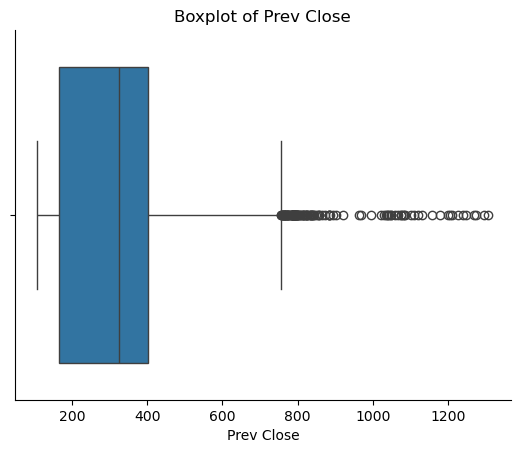

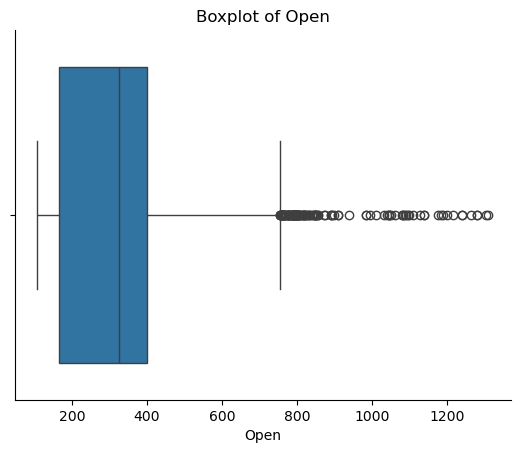

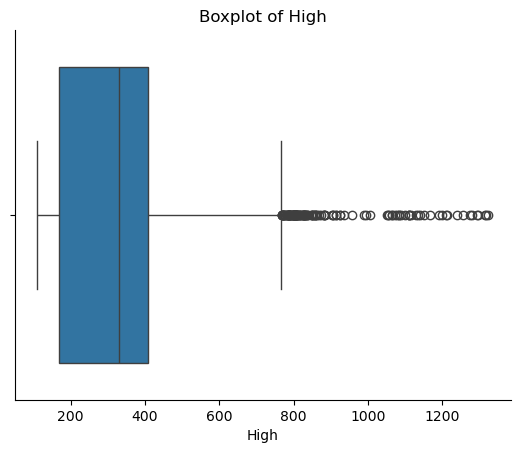

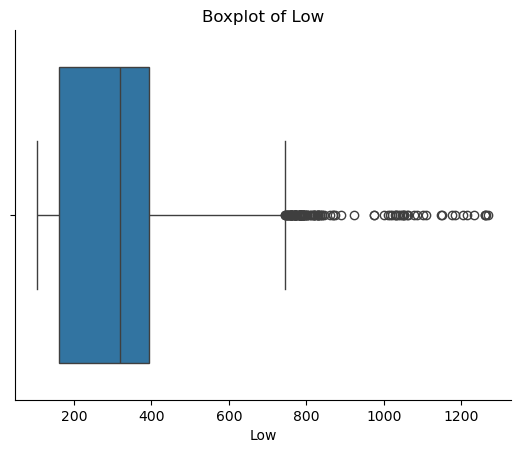

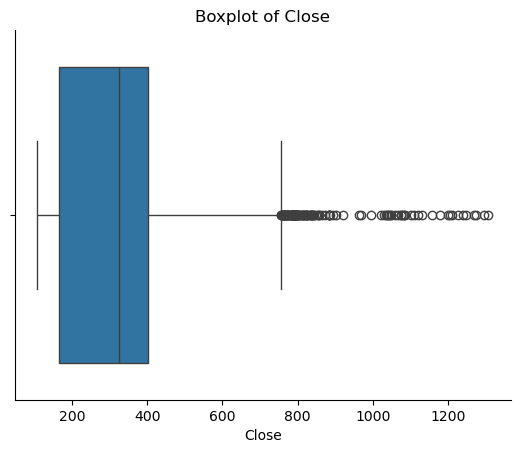

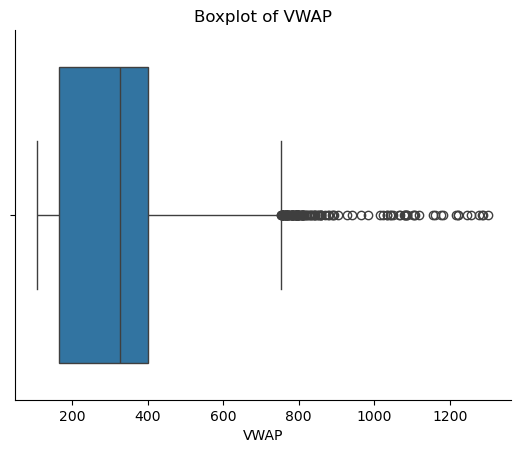

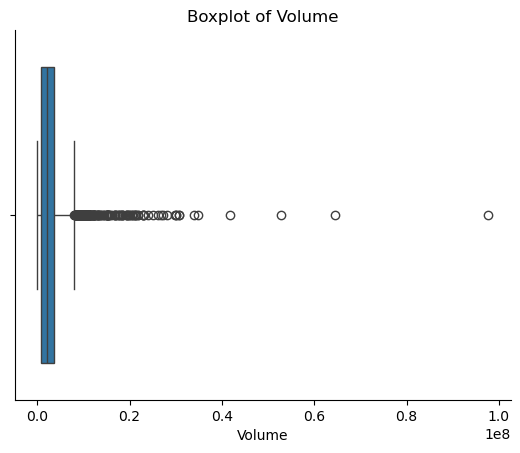

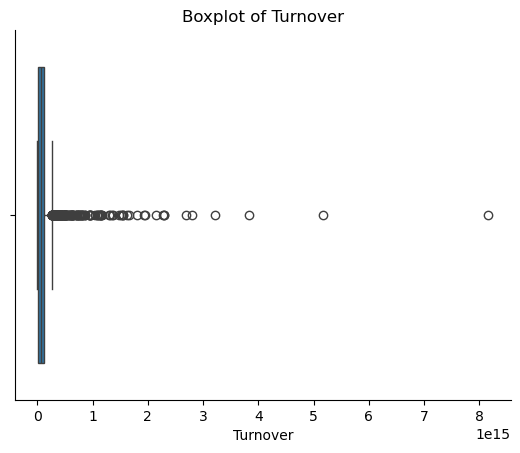

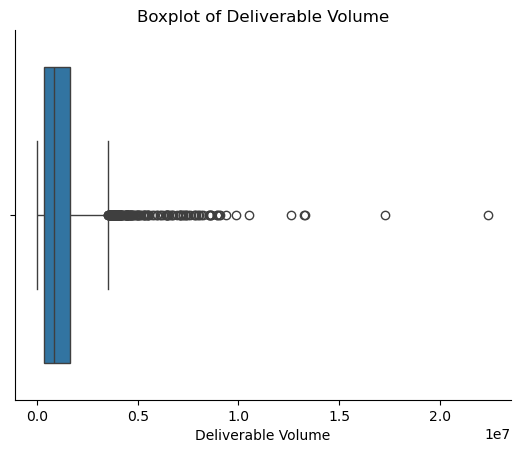

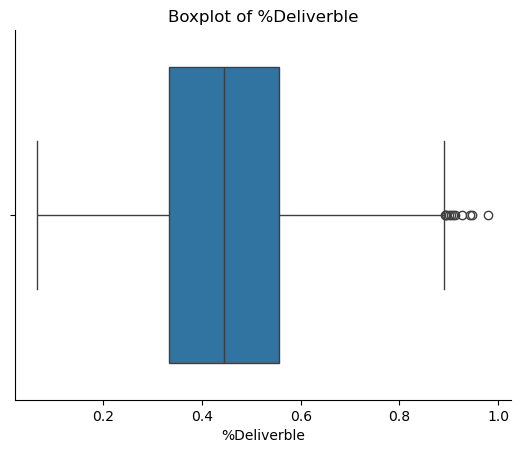

In [10]:
# Loop through each column to plot boxplots 
for column in All_Columns: 
    plot_boxplot(df, column);

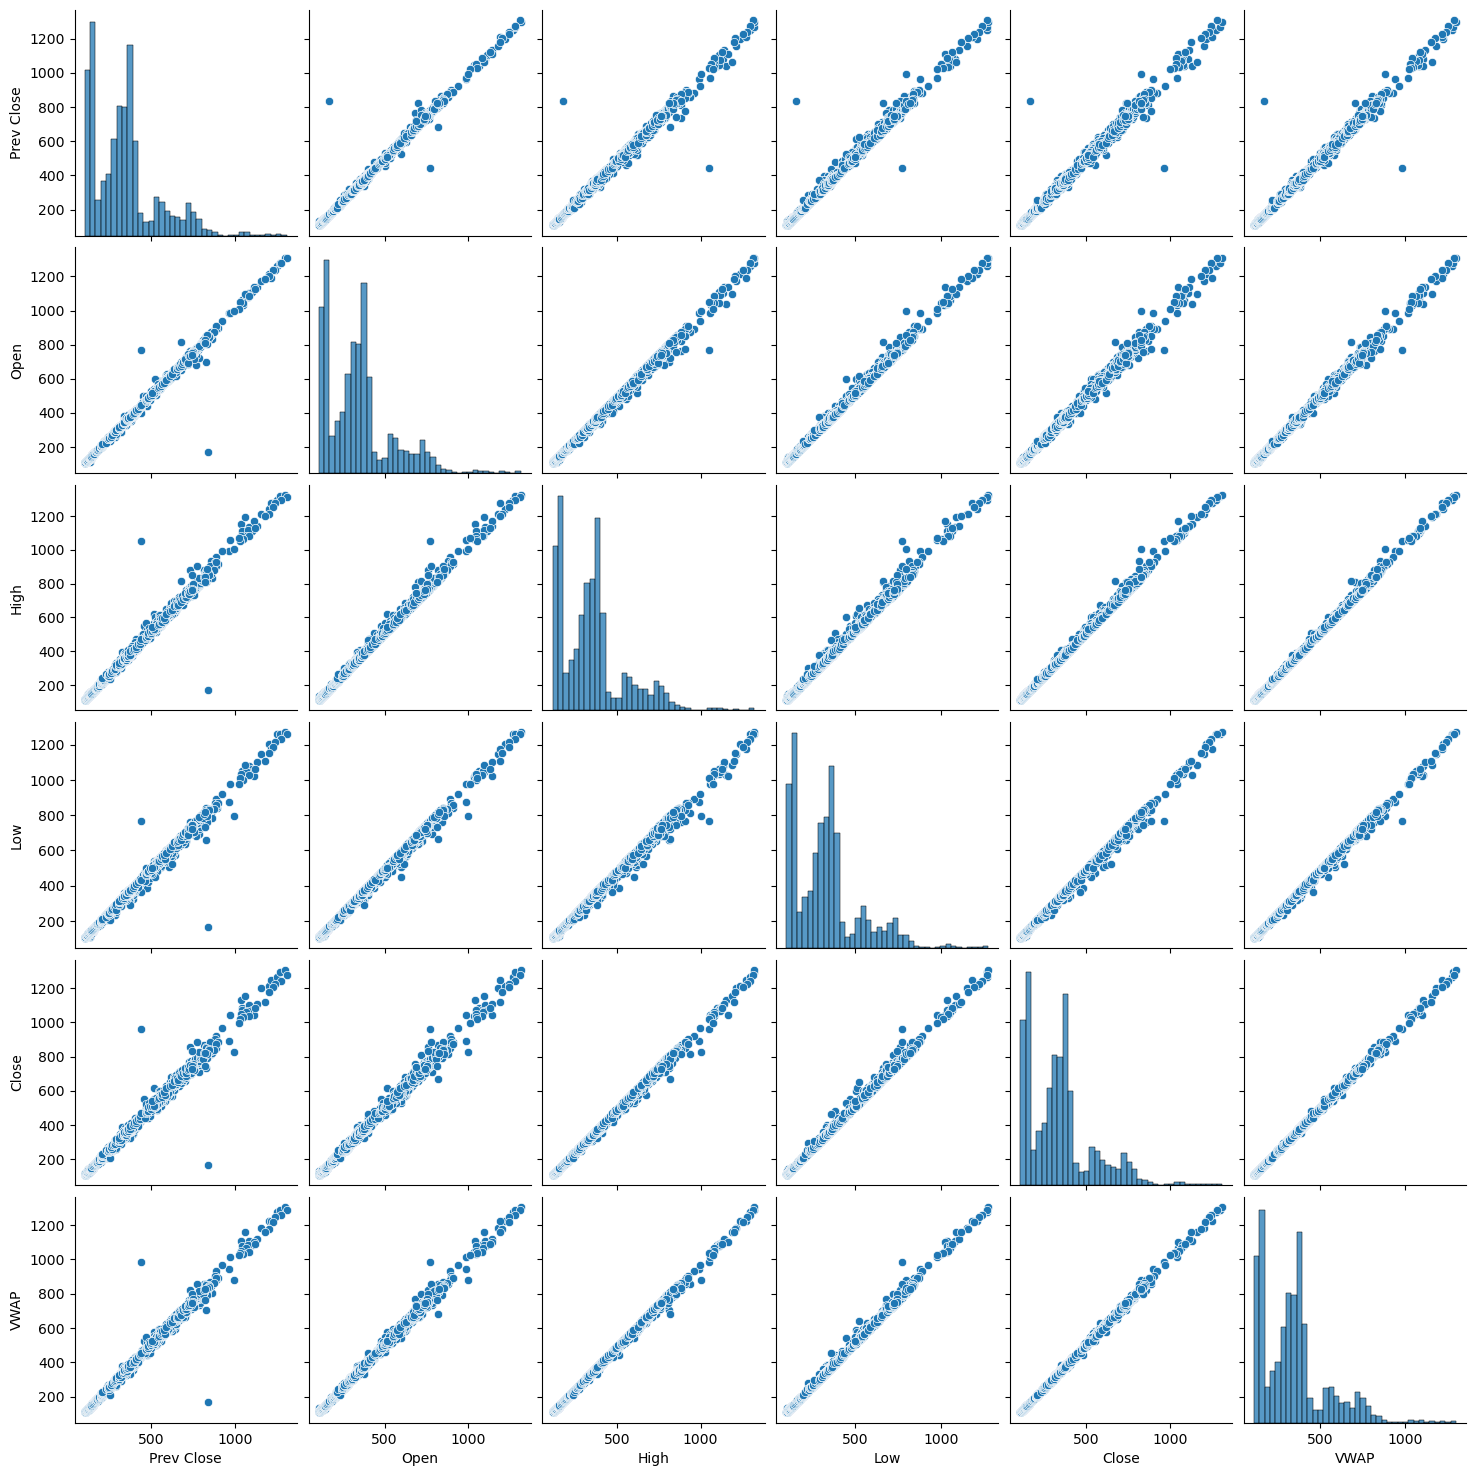

In [11]:
# For price data
plot_pairplot(df, priceData);

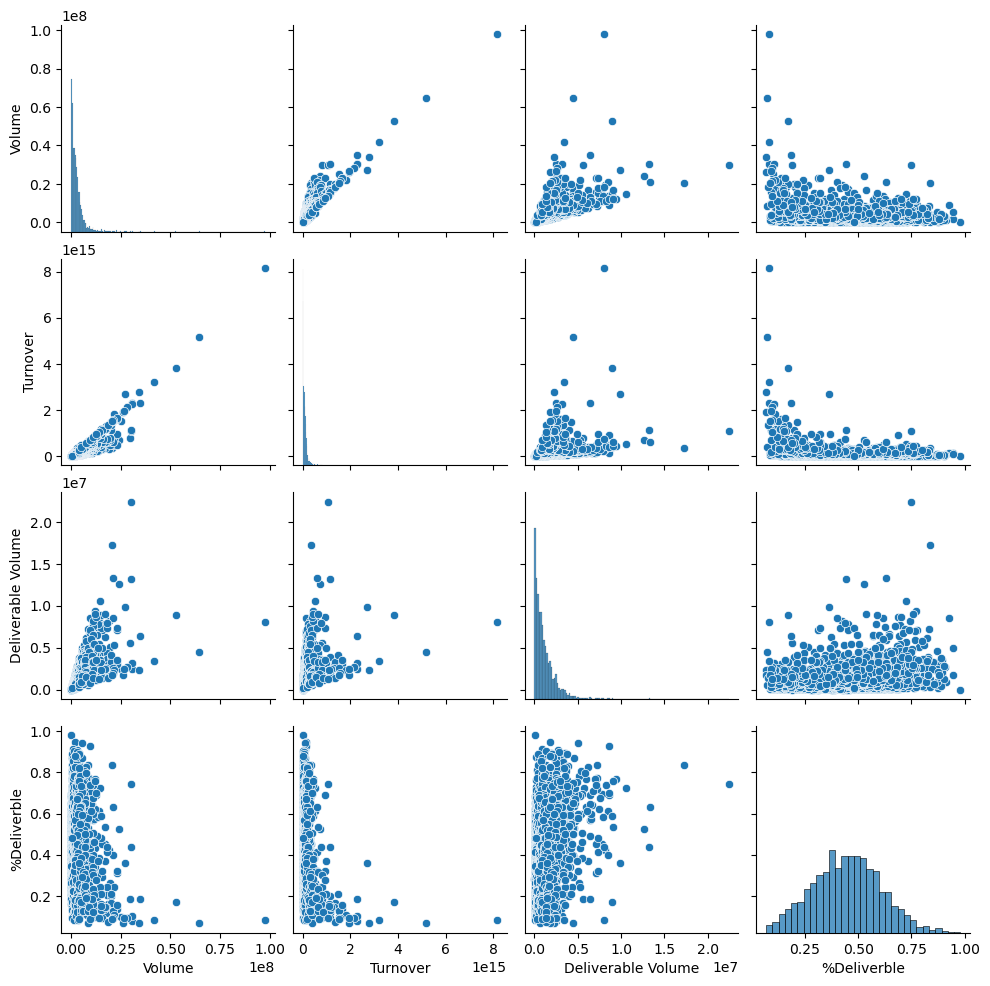

In [12]:
# For volume data
plot_pairplot(df, volumeData);

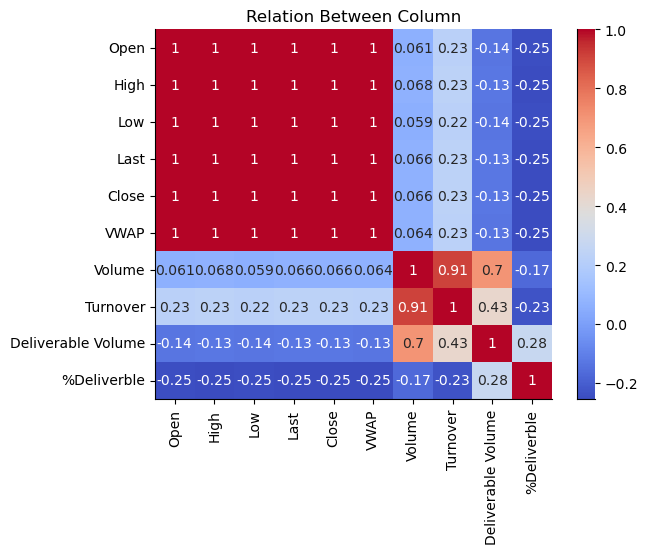

In [13]:
plot_heatmap(df.iloc[:,1:], 'Relation Between Column');

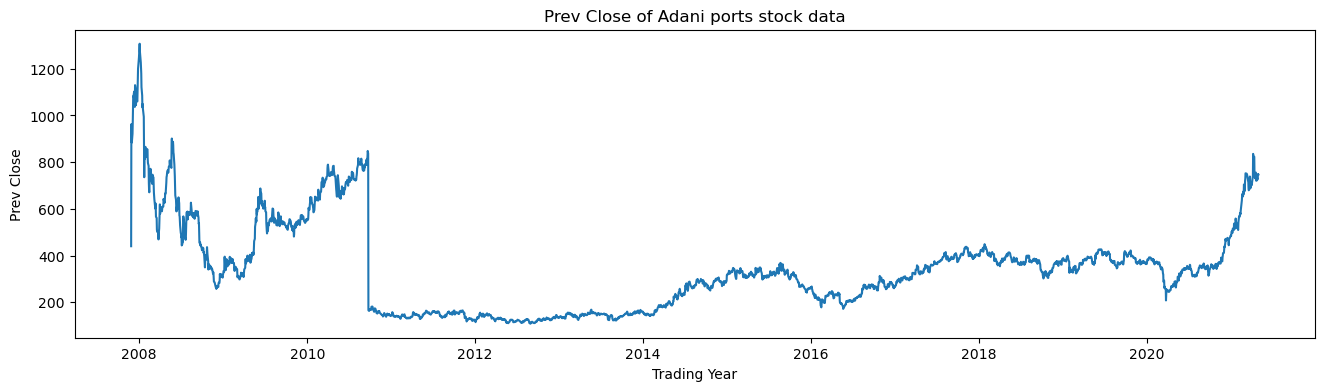

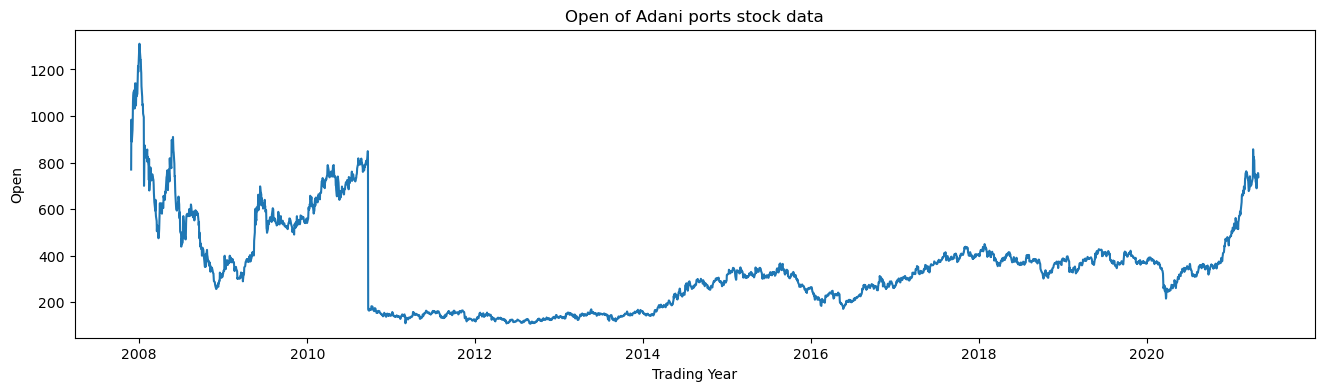

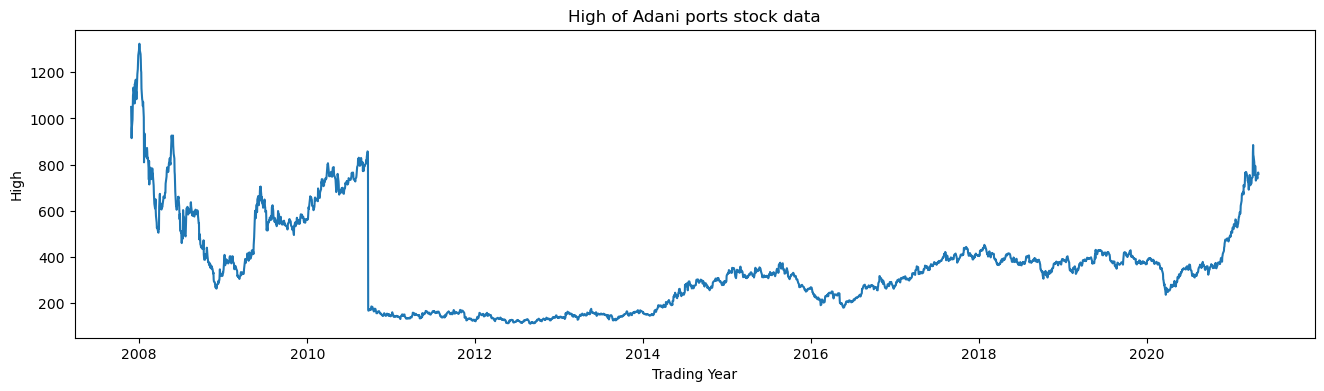

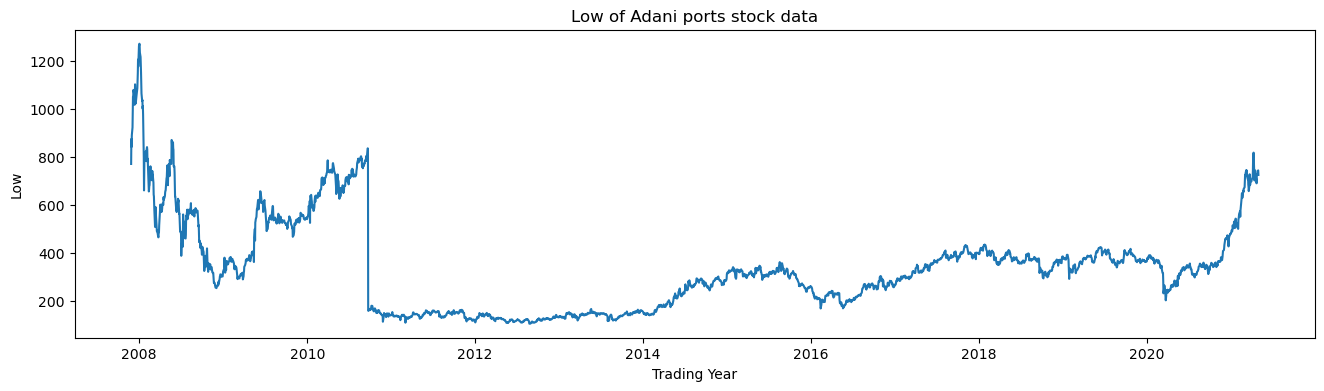

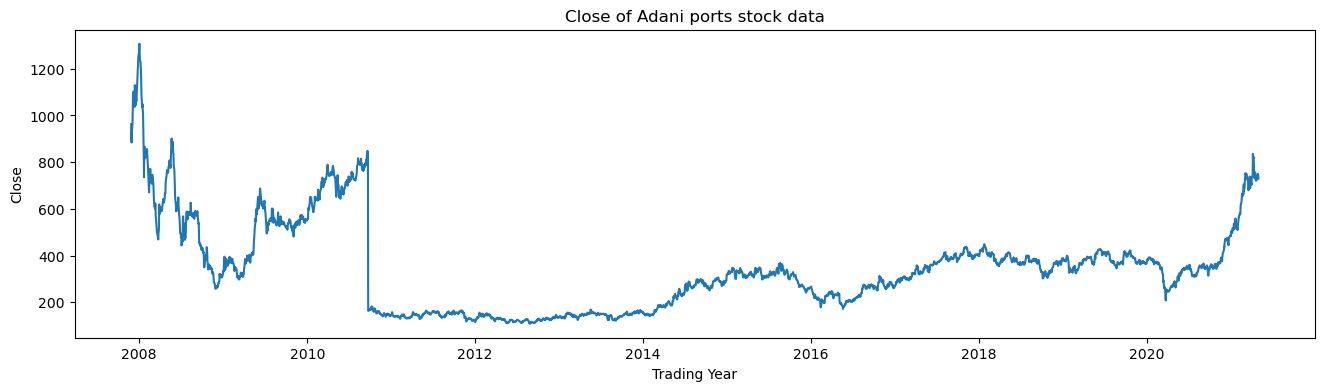

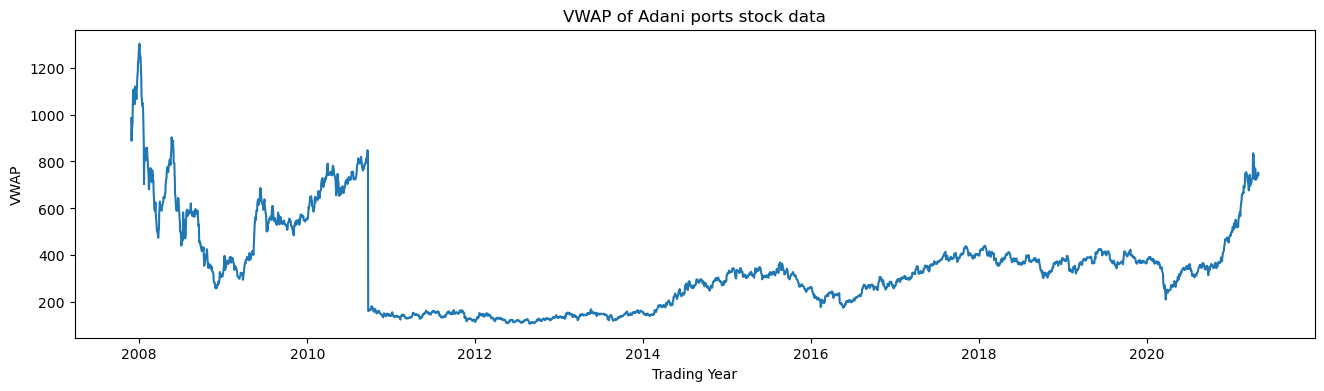

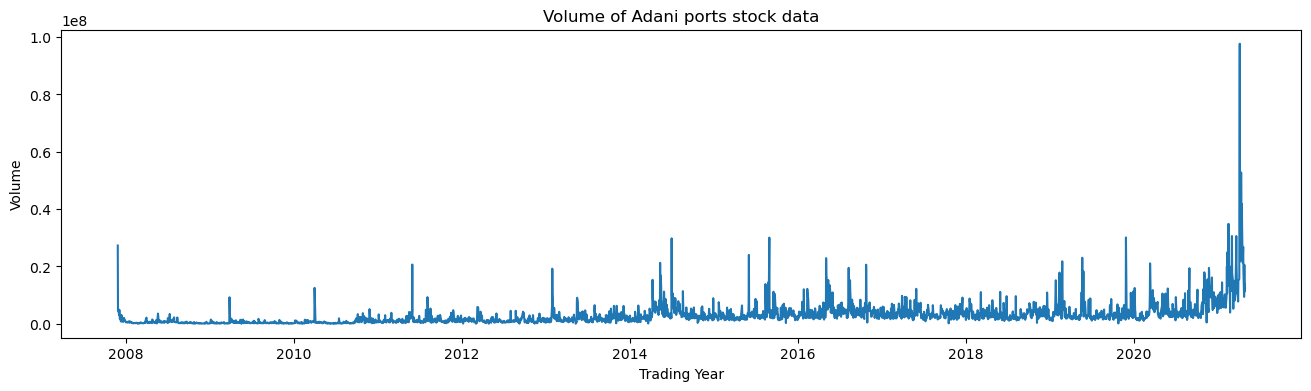

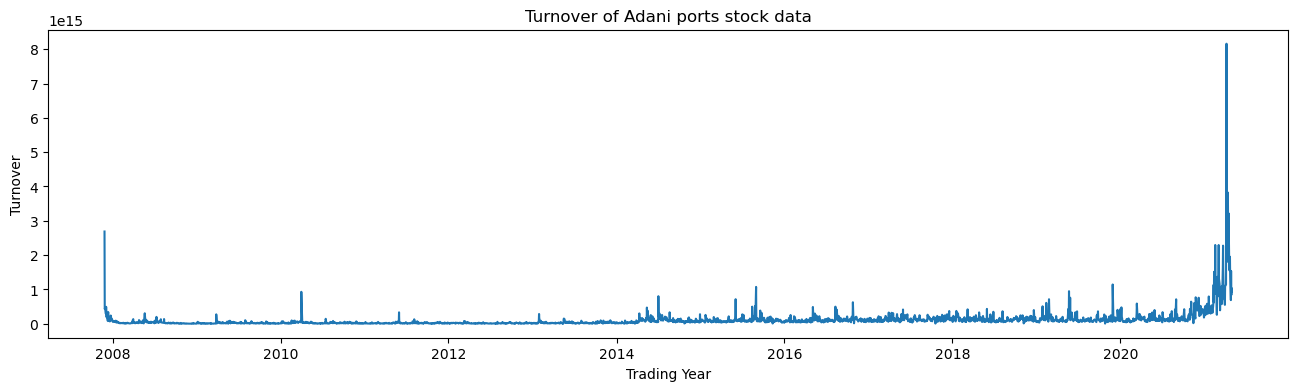

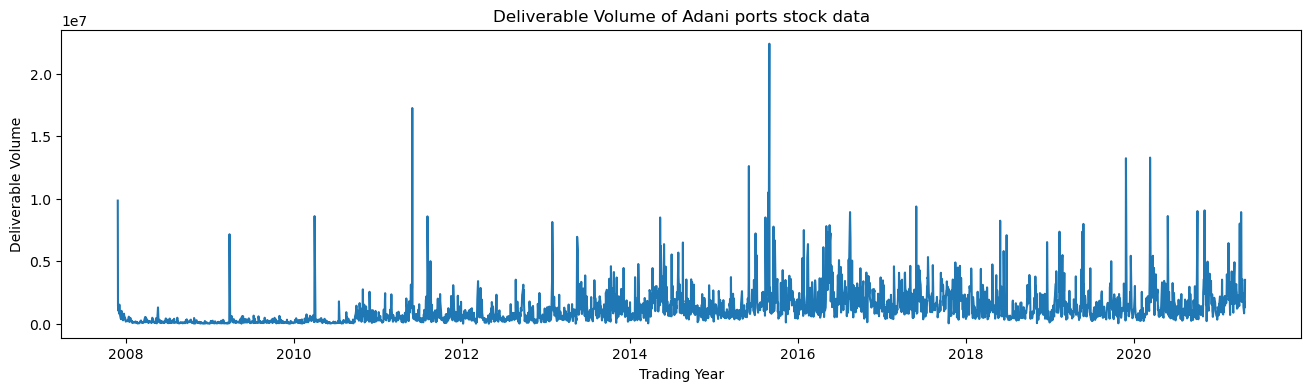

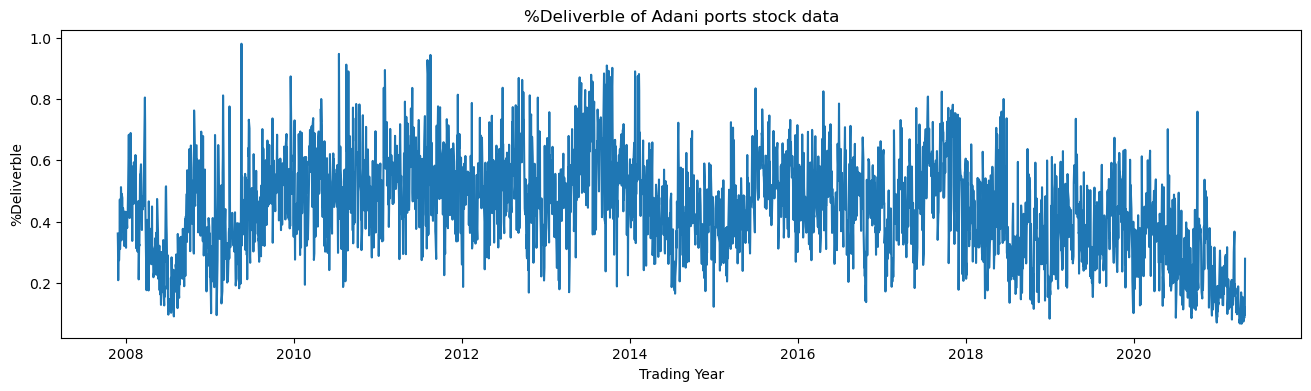

In [14]:
plot_timeSeries(df, All_Columns);

In [15]:
scaler = MinMaxScaler();
scaled_data = scaler.fit_transform(df[All_Columns]);
scaled_df = pd.DataFrame(scaled_data, columns=All_Columns, index=df.index);
print(scaled_df.head());

            Prev Close      Open      High       Low     Close      VWAP  \
Date                                                                       
2007-11-27    0.276794  0.550634  0.774216  0.570576  0.712743  0.734103   
2007-11-28    0.712743  0.728634  0.724774  0.659896  0.655217  0.697799   
2007-11-29    0.655217  0.666251  0.662766  0.631554  0.647130  0.653161   
2007-11-30    0.647130  0.650447  0.698406  0.673638  0.678269  0.687572   
2007-12-03    0.678269  0.691828  0.728895  0.701121  0.718079  0.718129   

              Volume  Turnover  Deliverable Volume  %Deliverble  
Date                                                             
2007-11-27  0.279227  0.329318            0.439703     0.322305  
2007-11-28  0.046763  0.052818            0.064606     0.274102  
2007-11-29  0.052318  0.055733            0.047490     0.155346  
2007-11-30  0.047054  0.052456            0.056023     0.226227  
2007-12-03  0.030347  0.035202            0.036176     0.226884  


In [16]:
# Print the top 5 rows predictions data  
def printShapeResult(df):
    print("Predicted Results:");
    print(predictions_df.head());
    print(predictions_df.shape);

# Plot actual and predicted values
def plot_time_series(actual_series, predicted_series, title): 
    plt.figure(figsize=(16, 6));
    plt.plot(actual_series.index, actual_series, label='Actual');
    plt.plot(predicted_series.index, predicted_series, linestyle='--', label='Predicted');
    plt.title(title);
    plt.xlabel('Date');
    plt.ylabel('Value');
    plt.legend(loc='best');
    plt.grid(True);
    plt.show();

#It used to print Time Series plot with predict dataframe and actual dataframe
def TimeSeriesPlot(Model, column, predictDF):
    # these part are used to combine actual data and predict data
    comparison_df = pd.DataFrame({ 
        'Actual': actual_last_20[column].values, 
        'Predicted': predictDF[column].values 
    }, index=actual_last_20.index);
    
    # Plot actual and predicted values
    plot_time_series(comparison_df['Actual'], comparison_df['Predicted'], f"{column} - Actual vs Predicted ({Model})");

In [17]:
# Function to create sequences
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data)- seq_length):
        sequences.append(data[i:i + seq_length]);
        labels.append(data[i + seq_length]);
    return np.array(sequences), np.array(labels);

In [18]:
# Ensure inverse_transform is applied correctly 
def inverse_transform_predictions(predictions): 
    return scaler.inverse_transform(predictions);

In [19]:
# Define sequence length 
seq_length = 60;

# Create sequences 
sequences, labels = create_sequences(scaled_df.values, seq_length);

In [20]:
# Split data 
num_training_samples = int(0.8 * len(sequences));
X_train, X_test = sequences[:num_training_samples], sequences[num_training_samples:];
y_train, y_test = labels[:num_training_samples], sequences[num_training_samples:];

print(f"Training sequences shape: {X_train.shape}");
print(f"Training labels shape: {y_train.shape}");
print(f"Testing sequences shape: {X_test.shape}");
print(f"Testing labels shape: {y_test.shape}")

Training sequences shape: (2609, 60, 10)
Training labels shape: (2609, 10)
Testing sequences shape: (653, 60, 10)
Testing labels shape: (653, 60, 10)


In [21]:
# Capture last 20% of data for compare the predict result 
num_samples = len(X_test)
actual_last_20 = df.iloc[-num_samples: -1] 

In [22]:
# Using LSTM(Long Short Term Model);alogrithm to predict
model = Sequential();
model.add(Input(shape=(seq_length, len(All_Columns))));
model.add(LSTM(100, return_sequences=True, kernel_regularizer='l2'));
model.add(Dropout(0.3));
model.add(LSTM(100, kernel_regularizer='l2'));
model.add(Dropout(0.3));
model.add(Dense(len(All_Columns)));
optimizer = Adam(learning_rate=0.001);
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae']);

In [23]:
# Callbacks 
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True);

In [24]:
# Train model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.2279 - mae: 0.0773 - val_loss: 0.2168 - val_mae: 0.0375
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1370 - mae: 0.0530 - val_loss: 0.0188 - val_mae: 0.0319
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0152 - mae: 0.0482 - val_loss: 0.0059 - val_mae: 0.0429
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0070 - mae: 0.0463 - val_loss: 0.0045 - val_mae: 0.0298
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0064 - mae: 0.0444 - val_loss: 0.0043 - val_mae: 0.0305
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0061 - mae: 0.0439 - val_loss: 0.0045 - val_mae: 0.0357
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0056 - mae: 0.0406 - val_loss: 0.0040 - val_mae: 0.0293
Epoch 8/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0057 - mae: 0.0423 - val_loss: 0.0043 - val_mae: 0.0323
Epoch 9/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - lo

In [25]:
# Make predictions and inverse transform 
predictions = model.predict(X_test);
predictions = inverse_transform_predictions(predictions);

# Convert predictions to DataFrame 
predictions_df = pd.DataFrame(predictions, columns=All_Columns, index=df.index[-len(predictions):]);

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [26]:
# Print LSTM predict result
printShapeResult(predictions_df);

Predicted Results:
            Prev Close        Open        High         Low       Close  \
Date                                                                     
2018-09-06  392.909973  394.144409  400.608002  386.730316  392.220459   
2018-09-07  392.649750  393.891785  400.374481  386.489655  391.940186   
2018-09-10  392.572327  393.825562  400.315308  386.417847  391.837128   
2018-09-11  392.595093  393.866455  400.345123  386.432983  391.834320   
2018-09-12  392.649719  393.943848  400.394775  386.468994  391.865509   

                  VWAP       Volume      Turnover  Deliverable Volume  \
Date                                                                    
2018-09-06  392.860931  1983604.875  5.769466e+13         928899.5625   
2018-09-07  392.631287  1982574.500  5.777751e+13         929199.7500   
2018-09-10  392.576233  1981257.625  5.782773e+13         929292.1250   
2018-09-11  392.613159  1980212.125  5.783157e+13         929330.8750   
2018-09-12  392.672882  

In [27]:
# Align predictions with actual data 
predicted_last_20 = pd.DataFrame(predictions[-num_samples: -1], columns=All_Columns, index=actual_last_20.index)

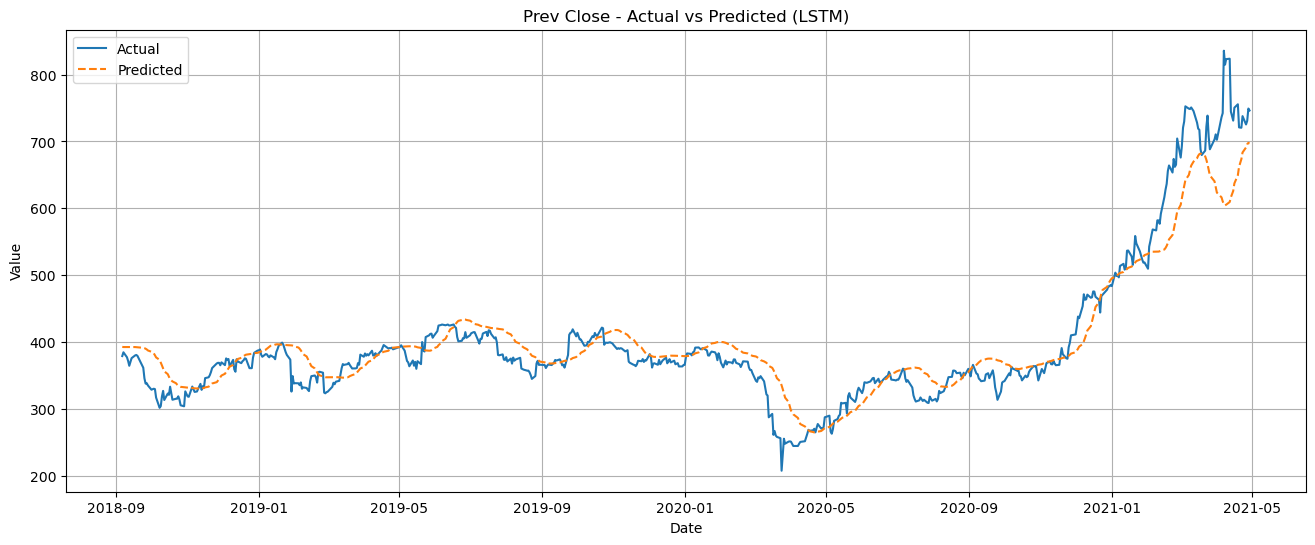

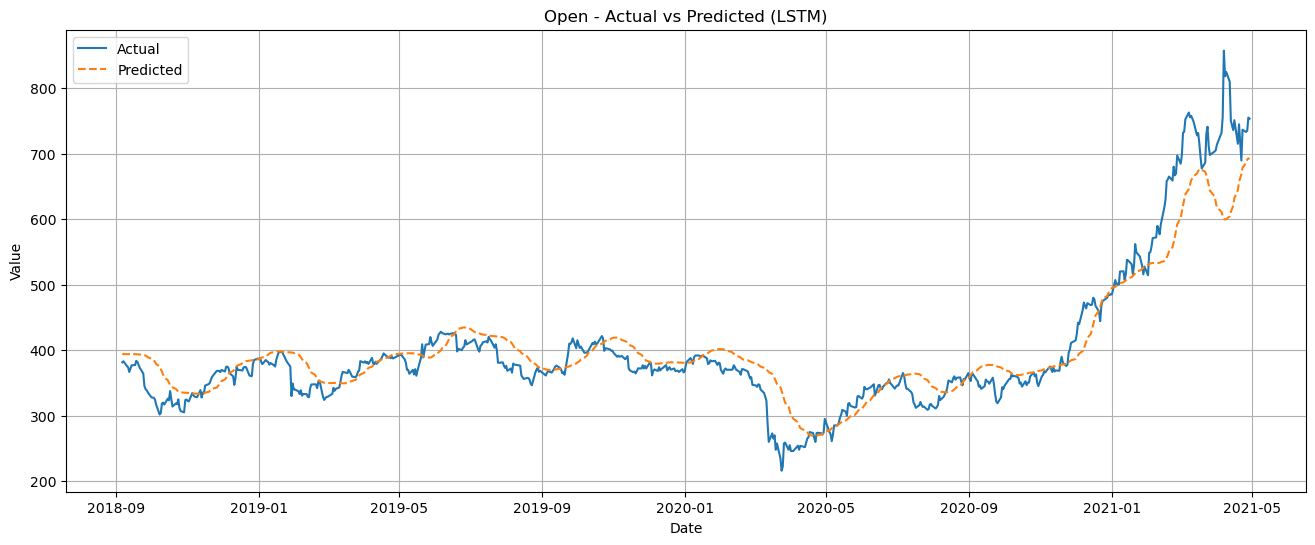

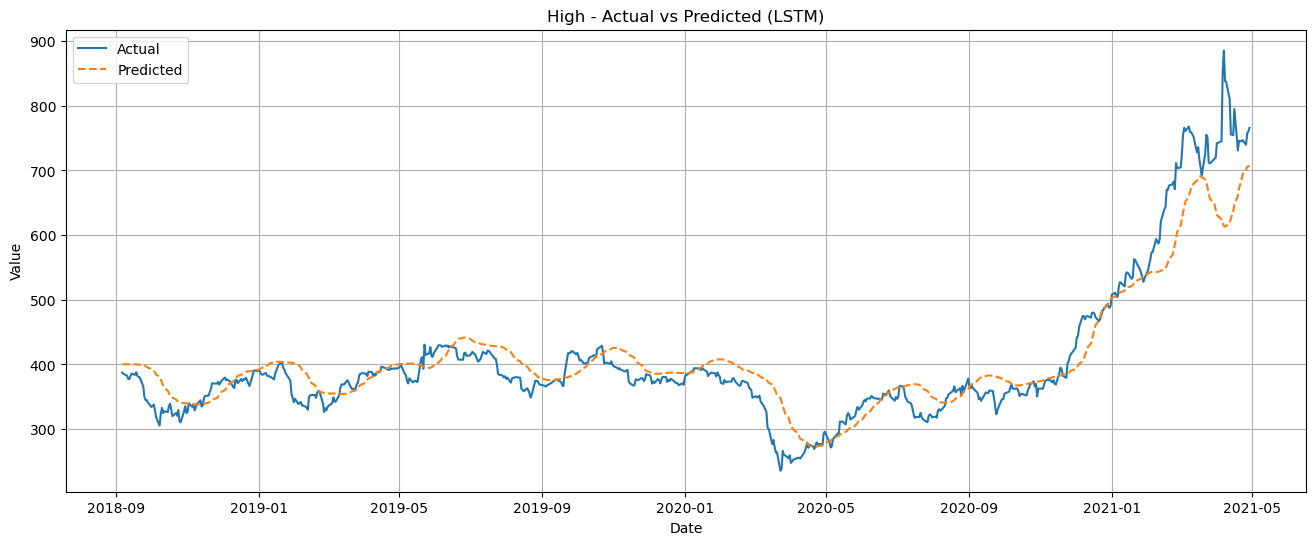

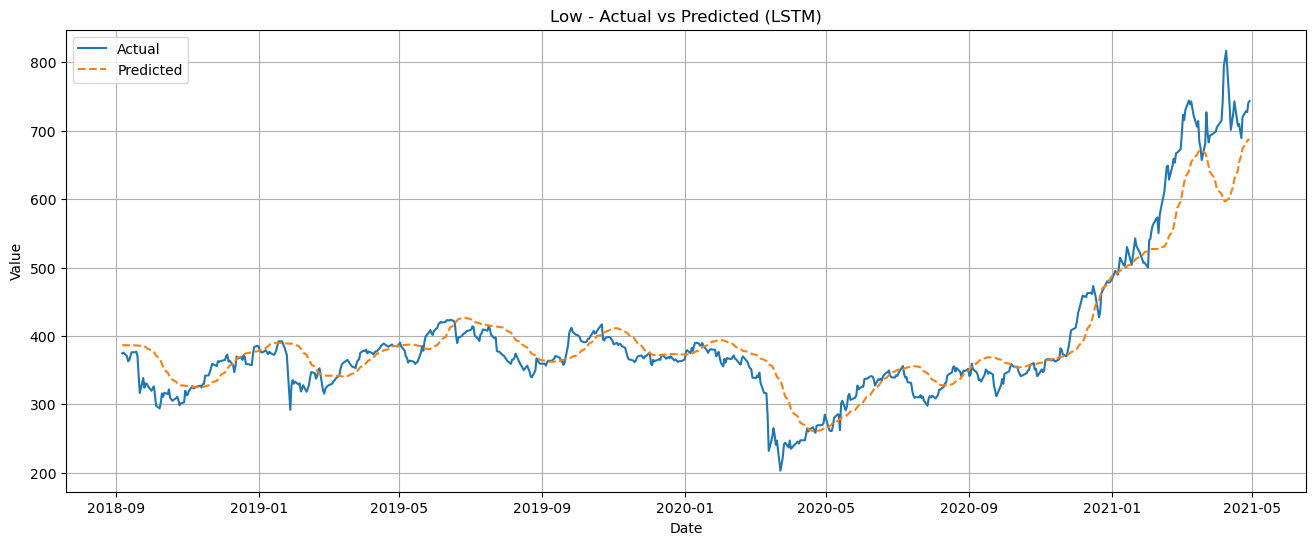

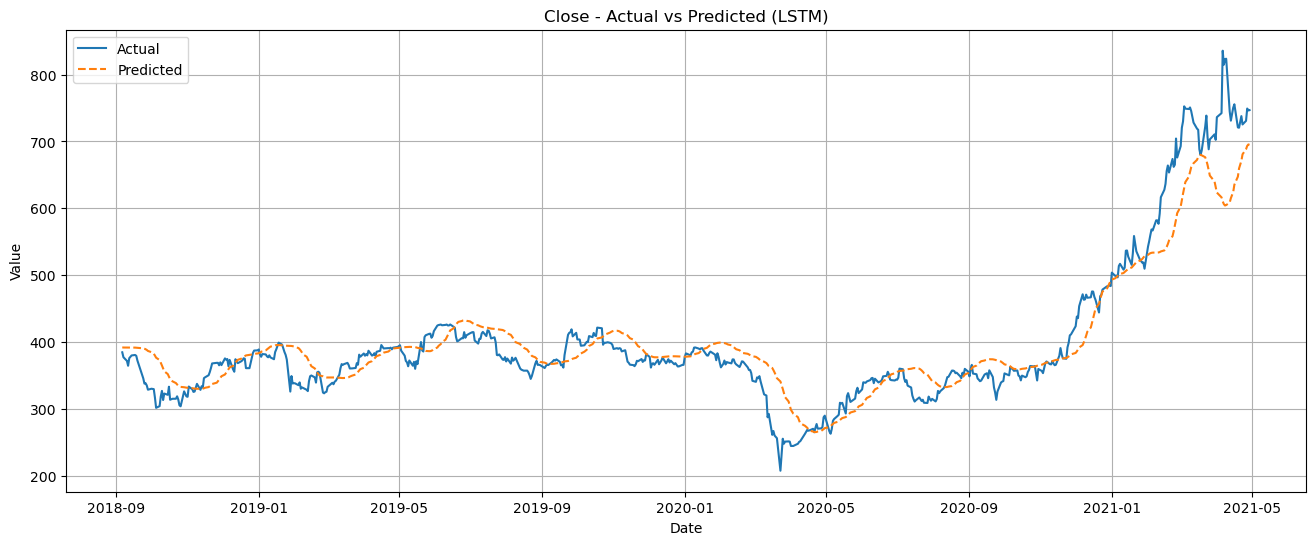

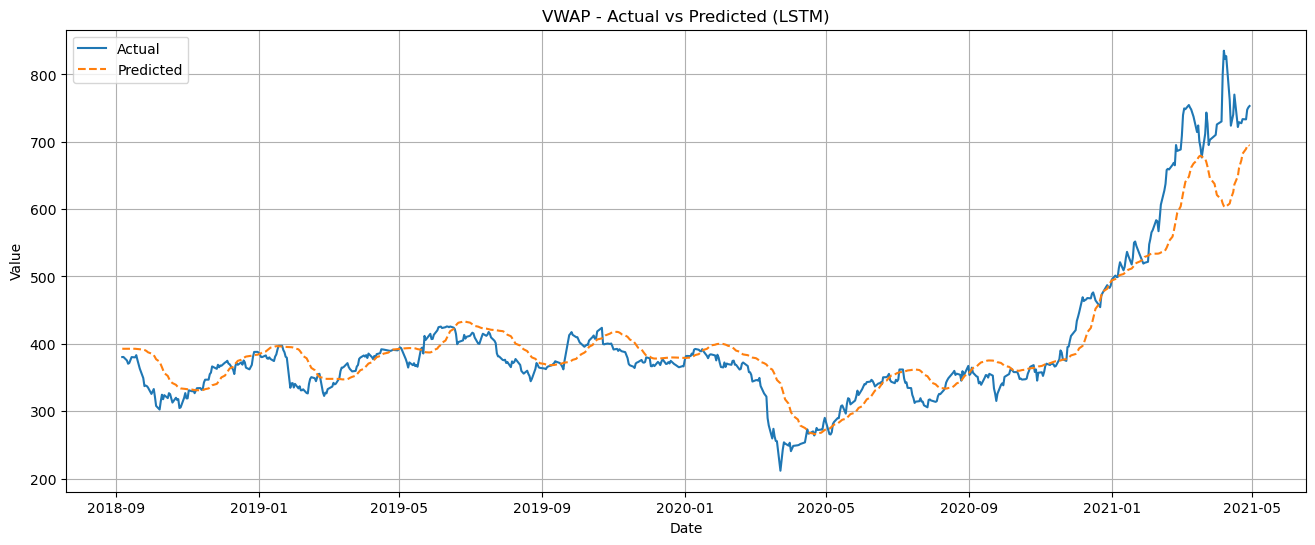

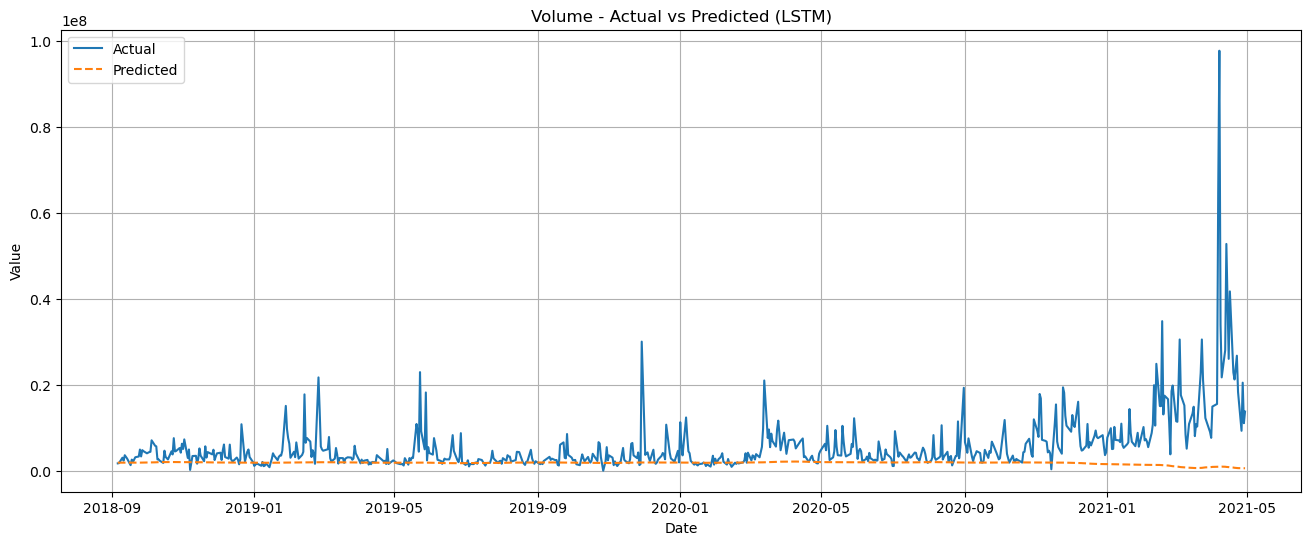

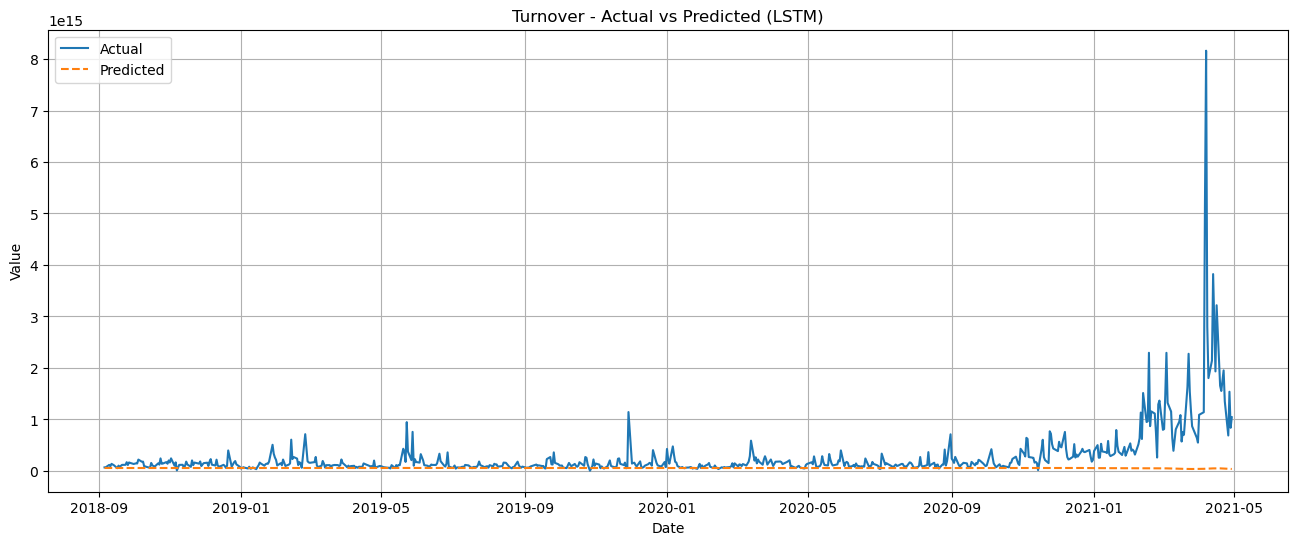

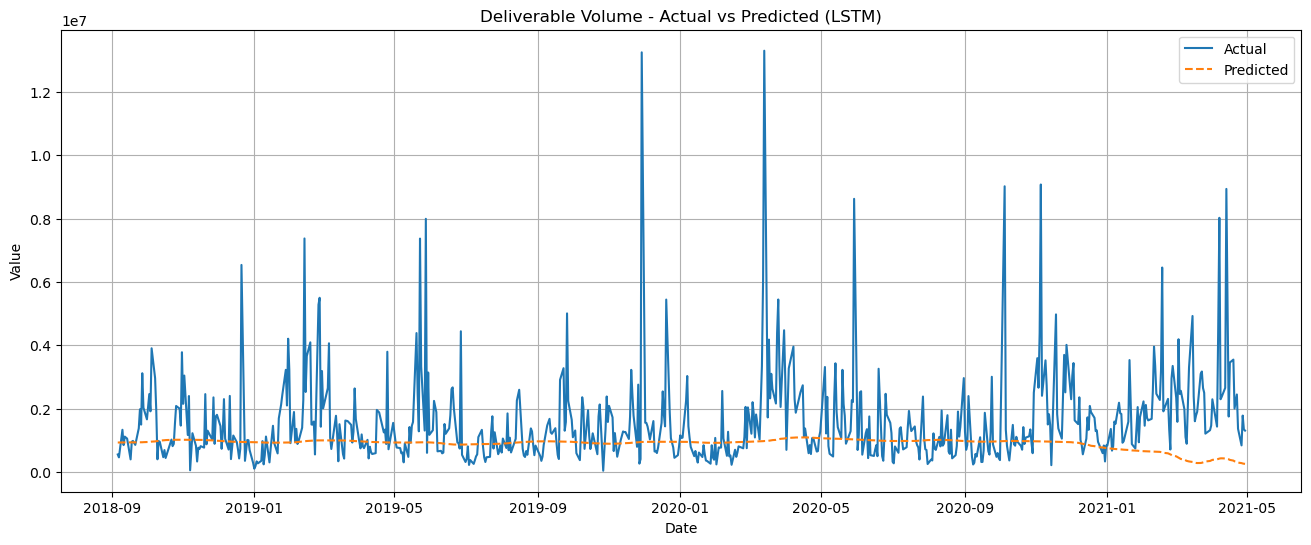

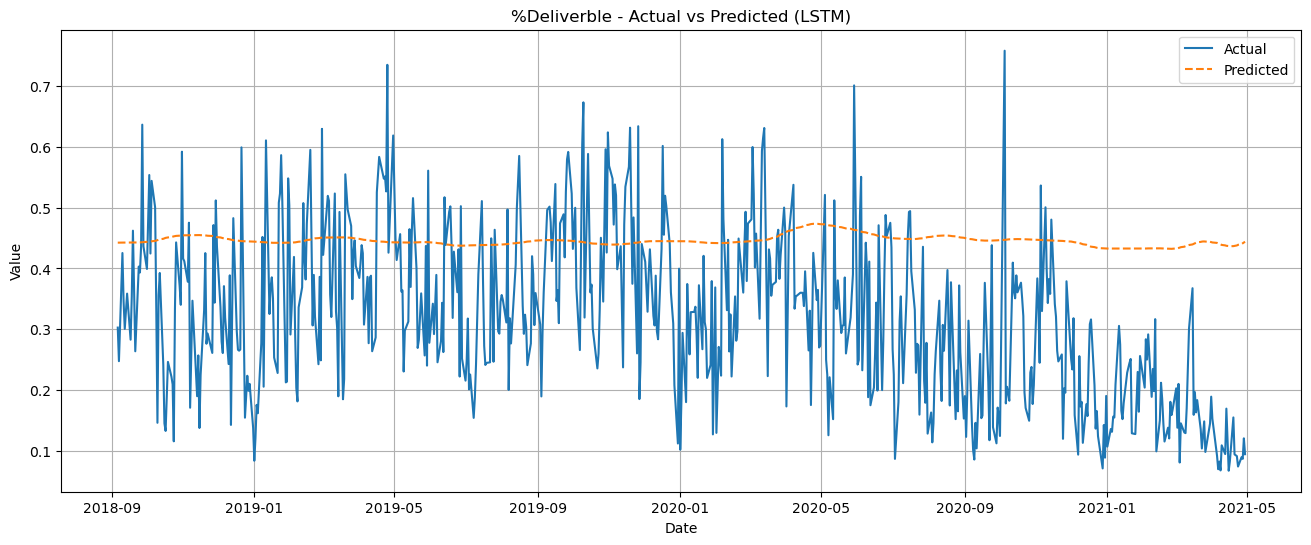

In [28]:
for columns in All_Columns:
    TimeSeriesPlot('LSTM', columns, predicted_last_20);

In [29]:
# Using RNN(Recurrent neural networks);model to predict 
RNNmodel = Sequential();
RNNmodel.add(Input(shape=(seq_length, len(All_Columns))));
RNNmodel.add(SimpleRNN(100, return_sequences=True))
RNNmodel.add(Dropout(0.3));
RNNmodel.add(SimpleRNN(100));
RNNmodel.add(Dropout(0.3));
RNNmodel.add(Dense(len(All_Columns)));
optimizer = Adam(learning_rate=0.001);
RNNmodel.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae']);

In [30]:
# Train model 
RNNmodel.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping]);

Epoch 1/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2156 - mae: 0.3555 - val_loss: 0.0078 - val_mae: 0.0657
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0393 - mae: 0.1529 - val_loss: 0.0039 - val_mae: 0.0430
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0193 - mae: 0.1054 - val_loss: 0.0028 - val_mae: 0.0319
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0133 - mae: 0.0855 - val_loss: 0.0029 - val_mae: 0.0315
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0104 - mae: 0.0744 - val_loss: 0.0025 - val_mae: 0.0269
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0084 - mae: 0.0667 - val_loss: 0.0025 - val_mae: 0.0272
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0073 - mae: 0.0609 - val_loss: 0.0026 - val_mae: 0.0273
Epoch 8/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0066 - mae: 0.0576 - val_loss: 0.0023 - val_mae: 0.0231
Epoch 9/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - lo

In [31]:
# Make predictions
RNNpredictions = RNNmodel.predict(X_test);
RNNpredictions = scaler.inverse_transform(RNNpredictions);

# Convert predictions to DataFrame 
predictions_df_RNN = pd.DataFrame(RNNpredictions, columns=All_Columns, index=df.index[-len(RNNpredictions):]);

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [32]:
# Print RNN predict result
printShapeResult(predictions_df_RNN);

Predicted Results:
            Prev Close        Open        High         Low       Close  \
Date                                                                     
2018-09-06  392.909973  394.144409  400.608002  386.730316  392.220459   
2018-09-07  392.649750  393.891785  400.374481  386.489655  391.940186   
2018-09-10  392.572327  393.825562  400.315308  386.417847  391.837128   
2018-09-11  392.595093  393.866455  400.345123  386.432983  391.834320   
2018-09-12  392.649719  393.943848  400.394775  386.468994  391.865509   

                  VWAP       Volume      Turnover  Deliverable Volume  \
Date                                                                    
2018-09-06  392.860931  1983604.875  5.769466e+13         928899.5625   
2018-09-07  392.631287  1982574.500  5.777751e+13         929199.7500   
2018-09-10  392.576233  1981257.625  5.782773e+13         929292.1250   
2018-09-11  392.613159  1980212.125  5.783157e+13         929330.8750   
2018-09-12  392.672882  

In [33]:
# Align predictions with actual data 
predicted_last_20_RNN = pd.DataFrame(RNNpredictions[-num_samples: -1], columns=All_Columns, index=actual_last_20.index);

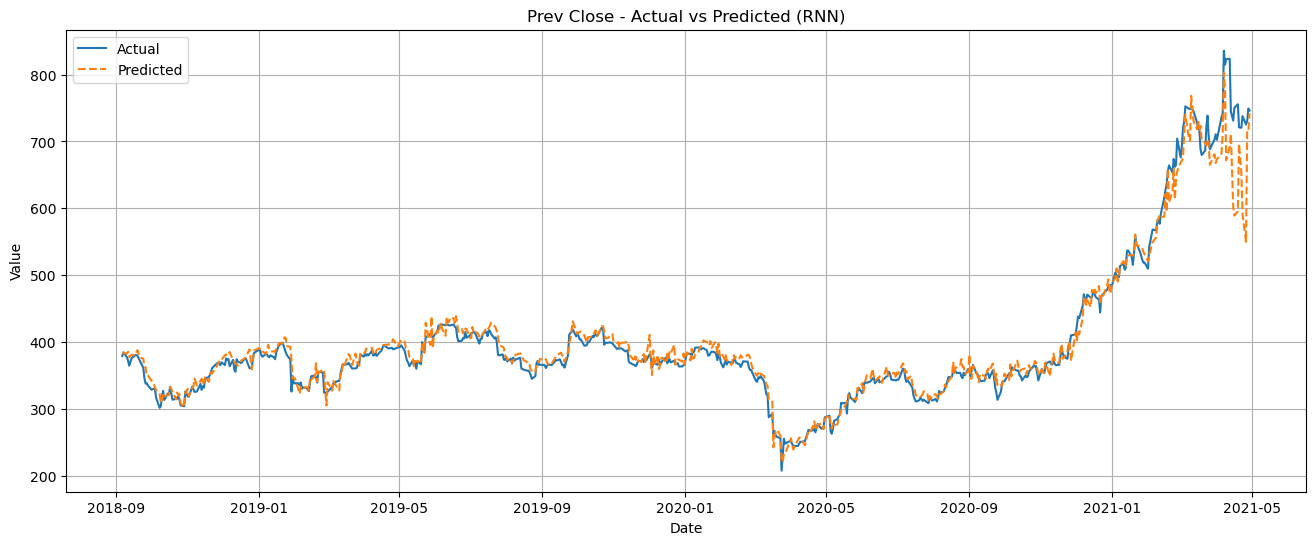

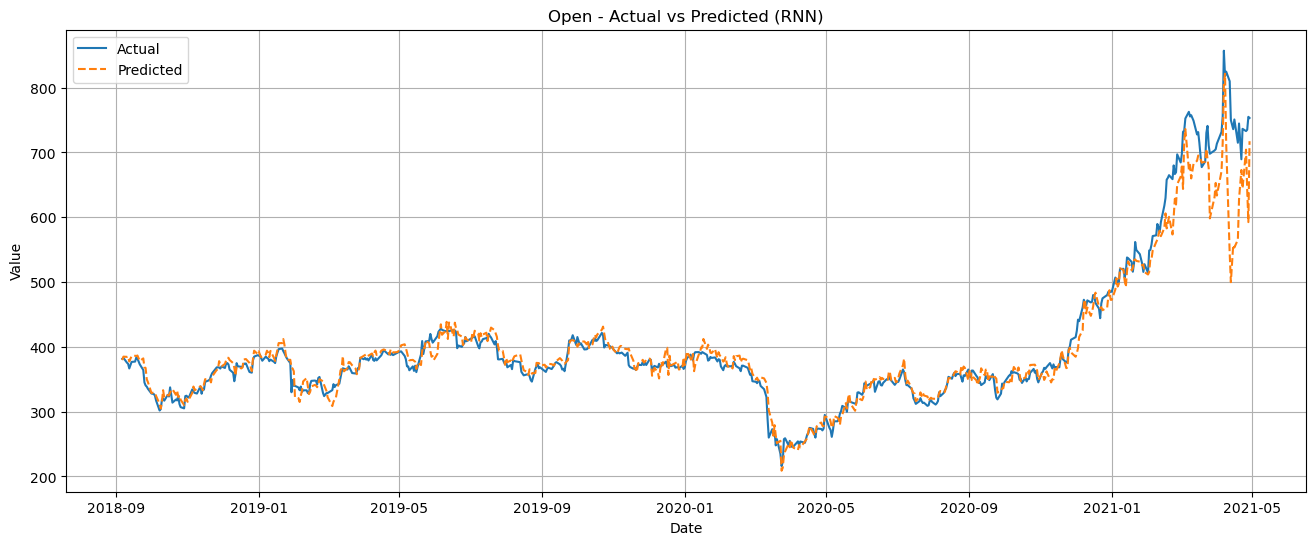

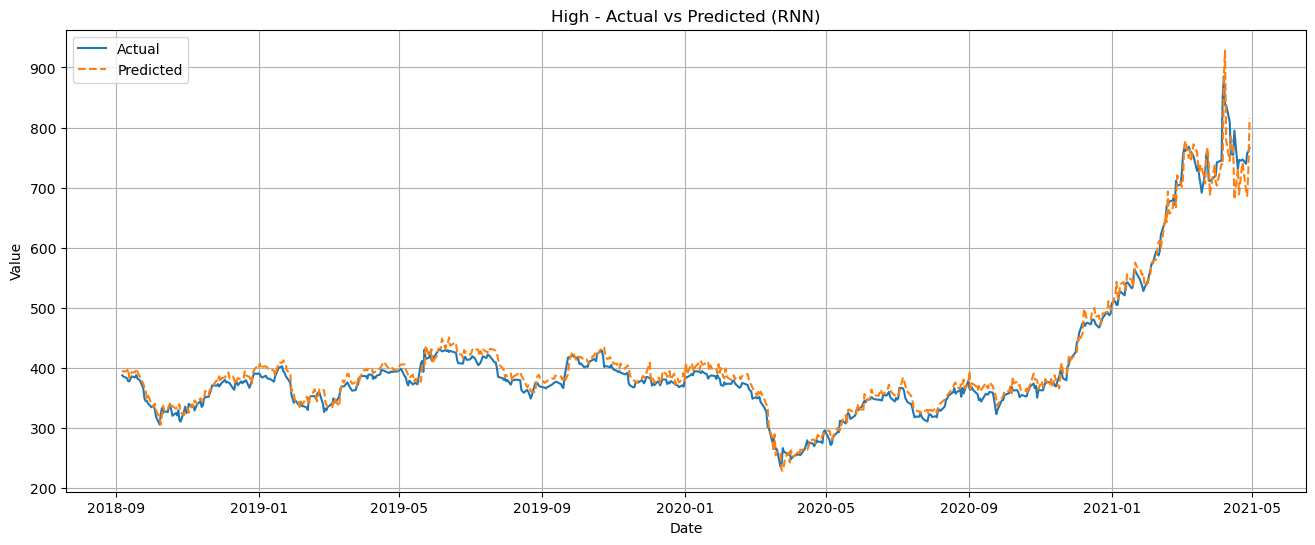

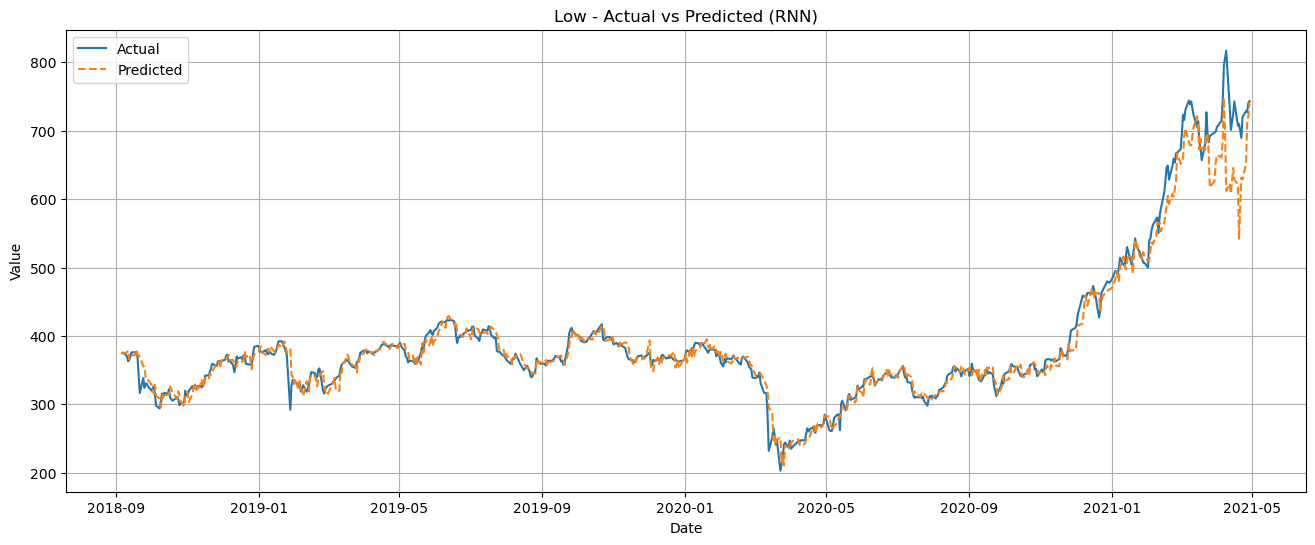

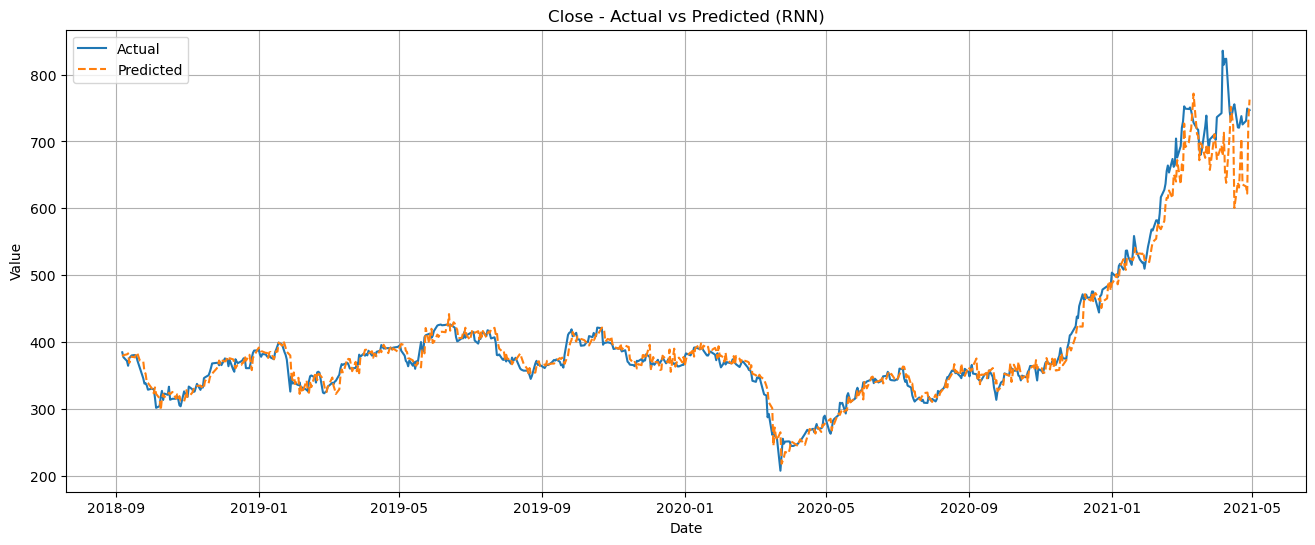

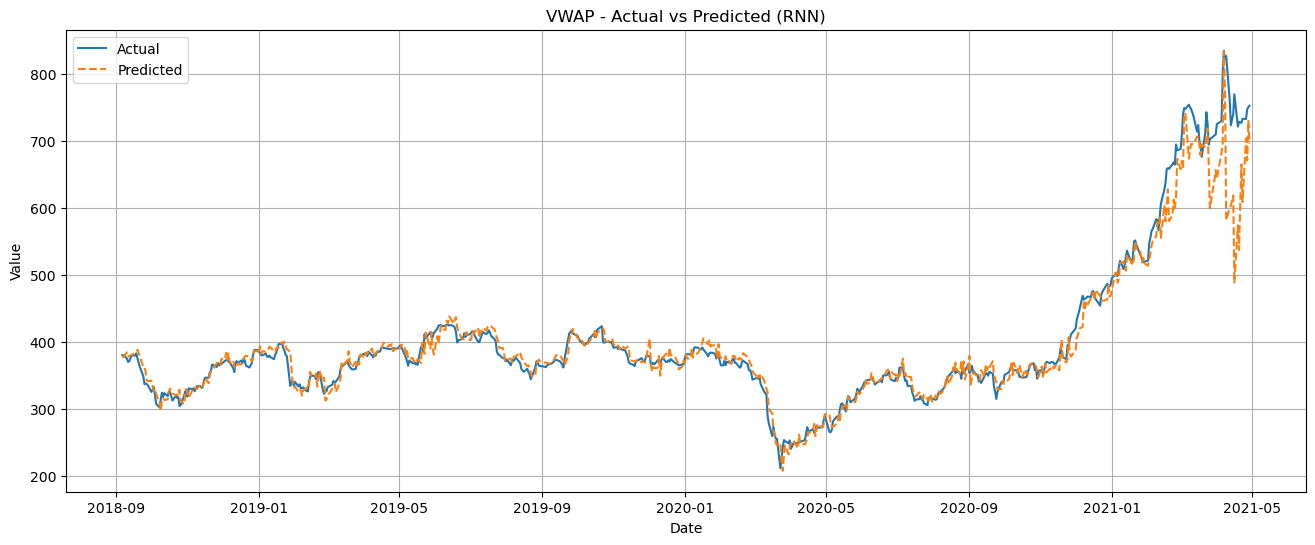

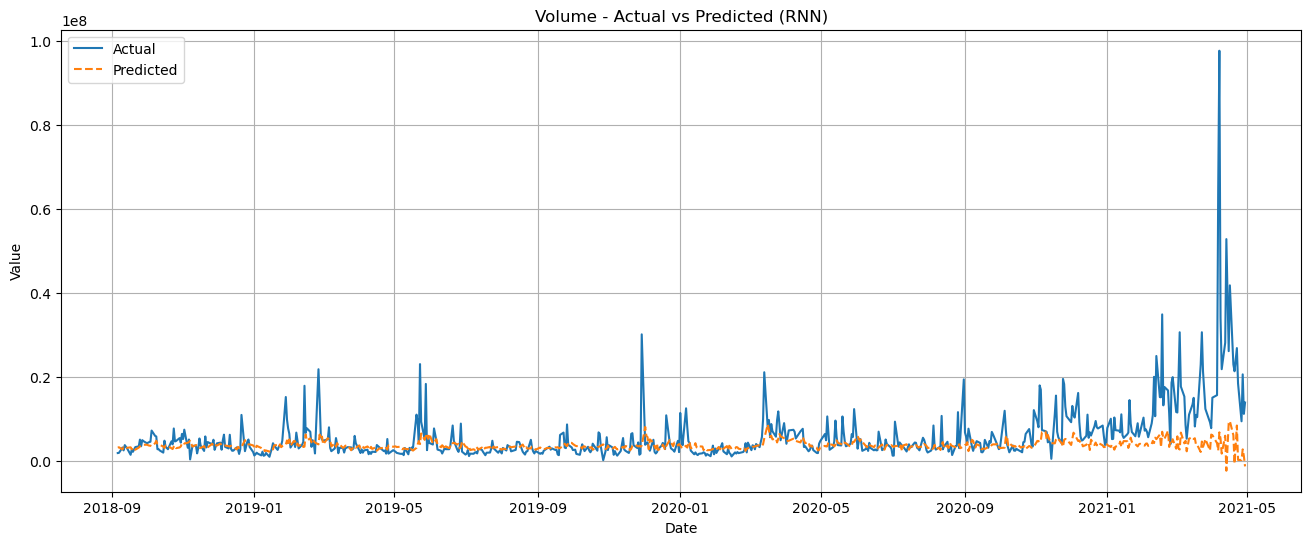

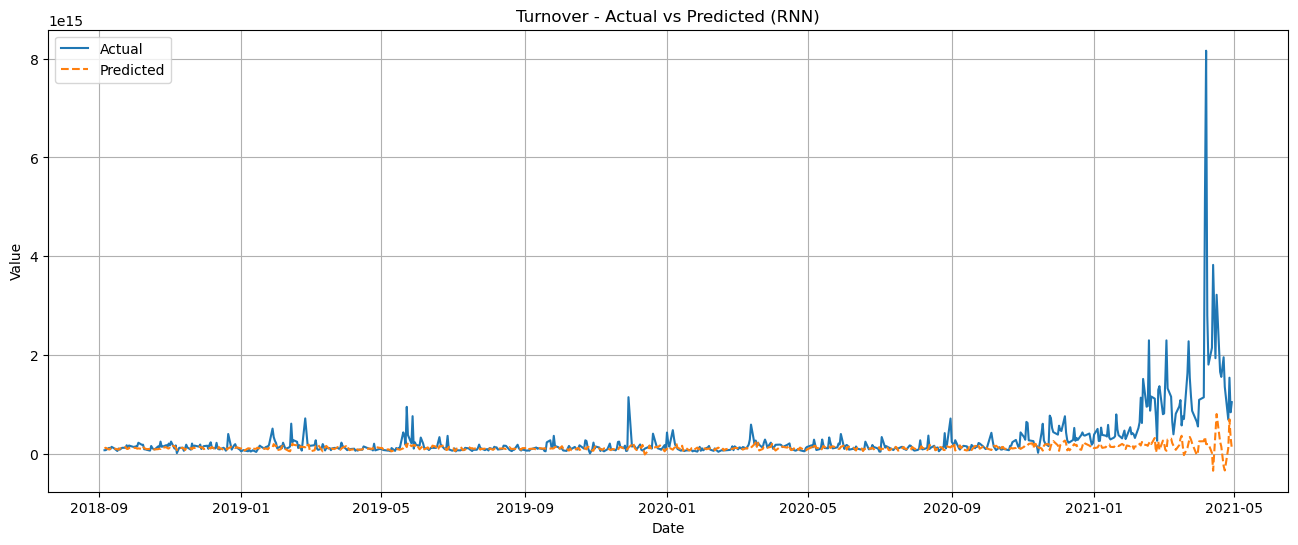

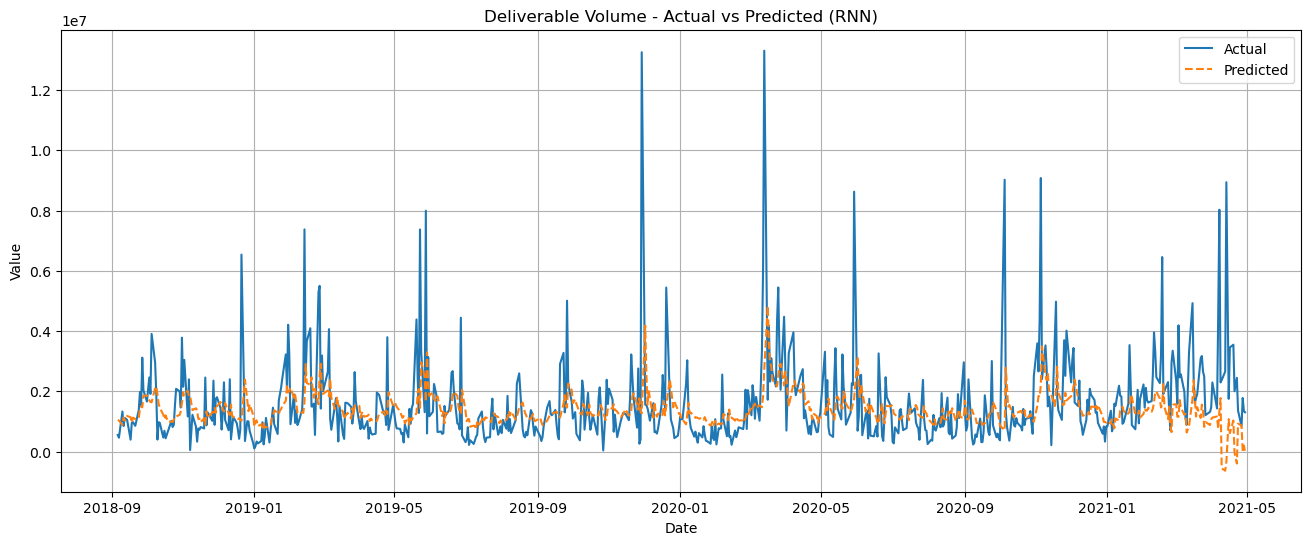

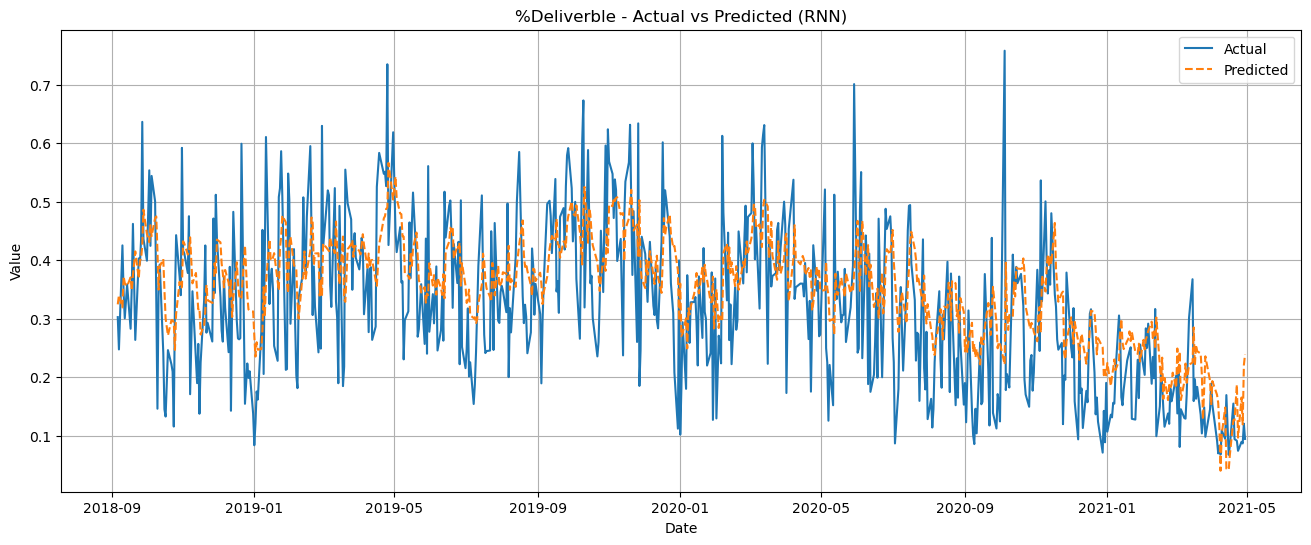

In [34]:
for columns in All_Columns:
    TimeSeriesPlot('RNN', columns, predicted_last_20_RNN);

In [35]:
# using CNN (Convolutional Neural Networks);alogrithm to predict
CNNmodel = Sequential();
CNNmodel.add(Input(shape=(seq_length, len(All_Columns))));
CNNmodel.add(Conv1D(filters=64, kernel_size=2, activation='relu'));
CNNmodel.add(MaxPooling1D(pool_size=2));
CNNmodel.add(Flatten());
CNNmodel.add(Dense(50, activation='relu'));
CNNmodel.add(Dropout(0.3))
CNNmodel.add(Dense(50, activation='relu'));
CNNmodel.add(Dropout(0.3));
CNNmodel.add(Dense(len(All_Columns)));
optimizer = Adam(learning_rate=0.001);
CNNmodel.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae']);

In [36]:
# Train model 
CNNmodel.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping]);

Epoch 1/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0357 - mae: 0.1269 - val_loss: 0.0064 - val_mae: 0.0578
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0114 - mae: 0.0729 - val_loss: 0.0038 - val_mae: 0.0364
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - mae: 0.0636 - val_loss: 0.0052 - val_mae: 0.0545
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - mae: 0.0613 - val_loss: 0.0040 - val_mae: 0.0388
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - mae: 0.0559 - val_loss: 0.0035 - val_mae: 0.0297
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 - mae: 0.0527 - val_loss: 0.0037 - val_mae: 0.0355
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061 - mae: 0.0503 - val_loss: 0.0037 - val_mae: 0.0362
Epoch 8/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - mae: 0.0469 - val_loss: 0.0040 - val_mae: 0.0433
Epoch 9/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.005

In [37]:
# Make predictions
CNNpredictions = CNNmodel.predict(X_test);
CNNpredictions = scaler.inverse_transform(CNNpredictions);

# Convert predictions to DataFrame 
predictions_df_CNN = pd.DataFrame(CNNpredictions, columns=All_Columns, index=df.index[-len(CNNpredictions):]);

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [38]:
# Print RNN predict result
printShapeResult(predictions_df_CNN);

Predicted Results:
            Prev Close        Open        High         Low       Close  \
Date                                                                     
2018-09-06  392.909973  394.144409  400.608002  386.730316  392.220459   
2018-09-07  392.649750  393.891785  400.374481  386.489655  391.940186   
2018-09-10  392.572327  393.825562  400.315308  386.417847  391.837128   
2018-09-11  392.595093  393.866455  400.345123  386.432983  391.834320   
2018-09-12  392.649719  393.943848  400.394775  386.468994  391.865509   

                  VWAP       Volume      Turnover  Deliverable Volume  \
Date                                                                    
2018-09-06  392.860931  1983604.875  5.769466e+13         928899.5625   
2018-09-07  392.631287  1982574.500  5.777751e+13         929199.7500   
2018-09-10  392.576233  1981257.625  5.782773e+13         929292.1250   
2018-09-11  392.613159  1980212.125  5.783157e+13         929330.8750   
2018-09-12  392.672882  

In [39]:
# Correct the slicing to include the last element
predicted_last_20_CNN = pd.DataFrame(CNNpredictions[-num_samples: -1], columns=All_Columns, index=actual_last_20.index);

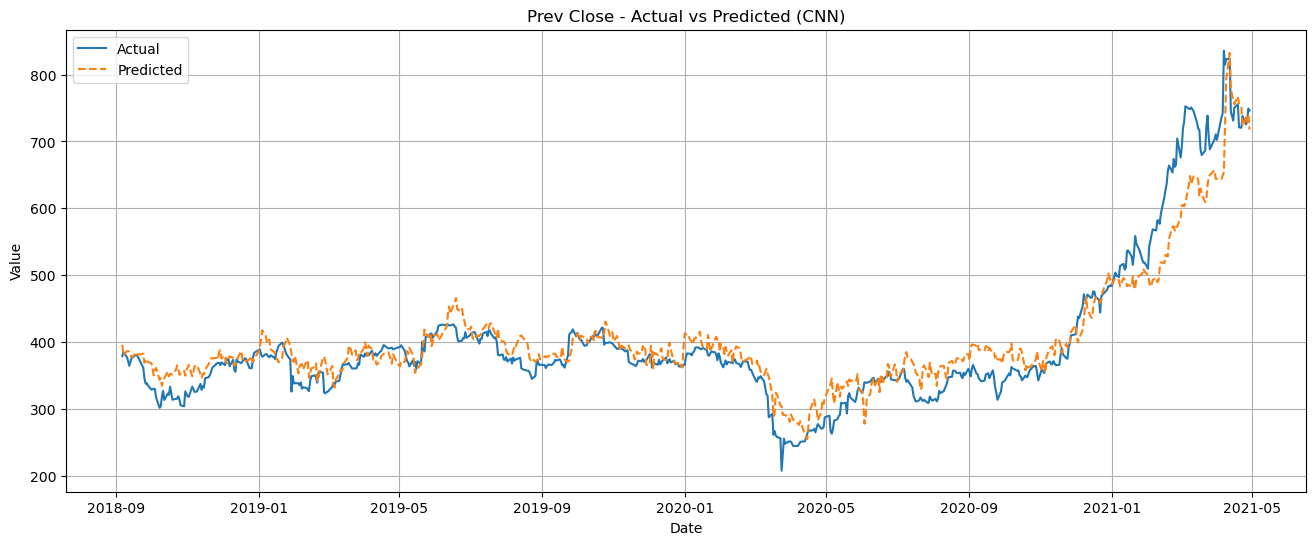

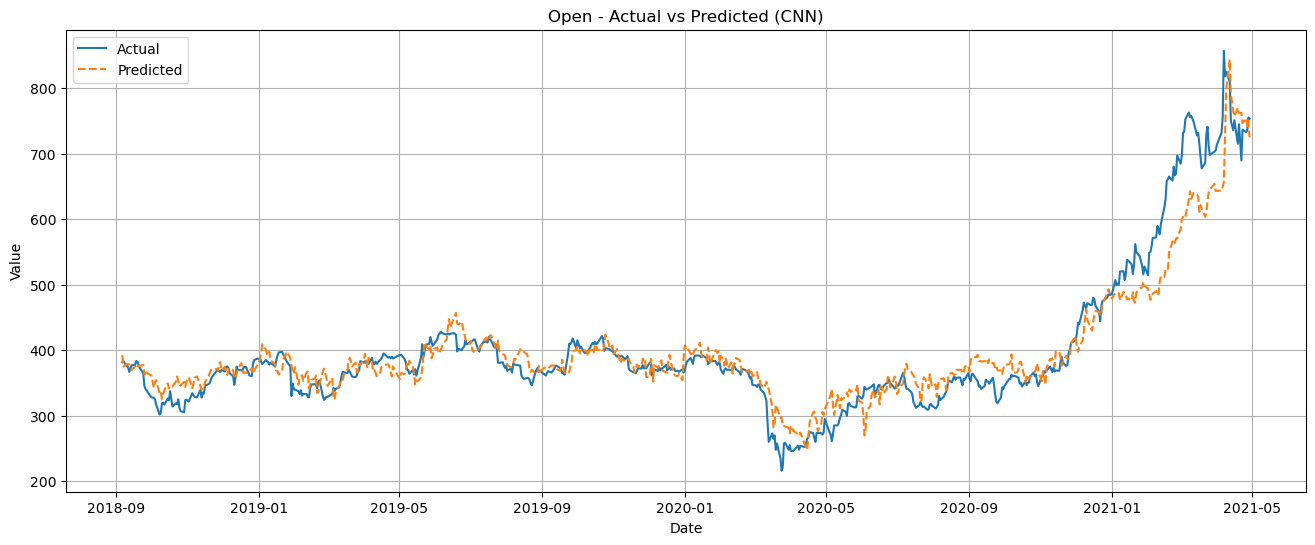

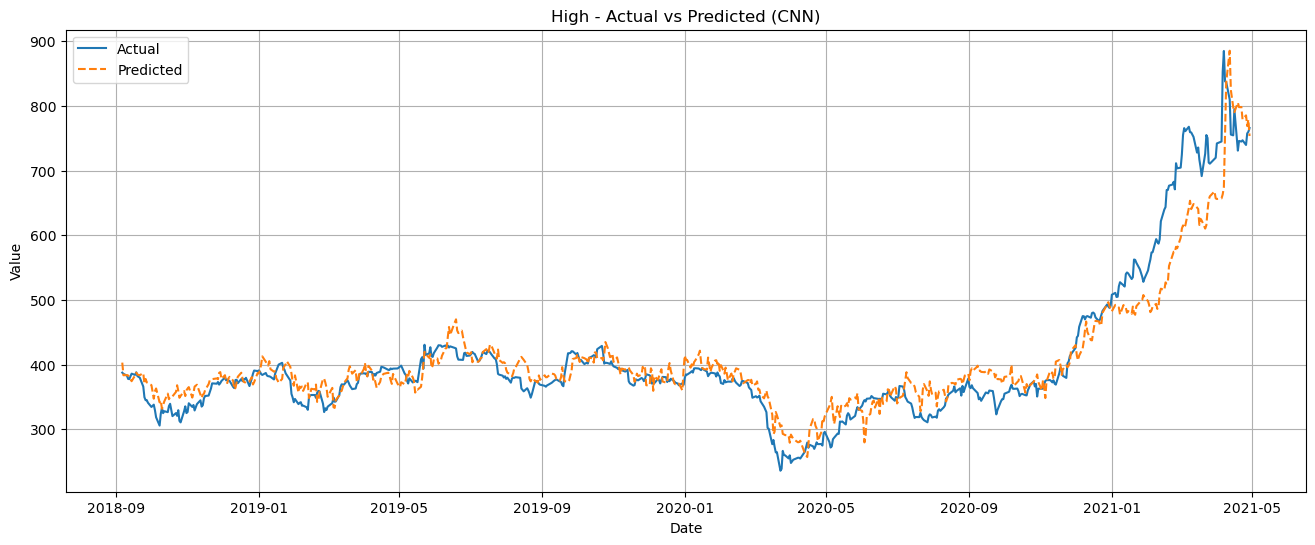

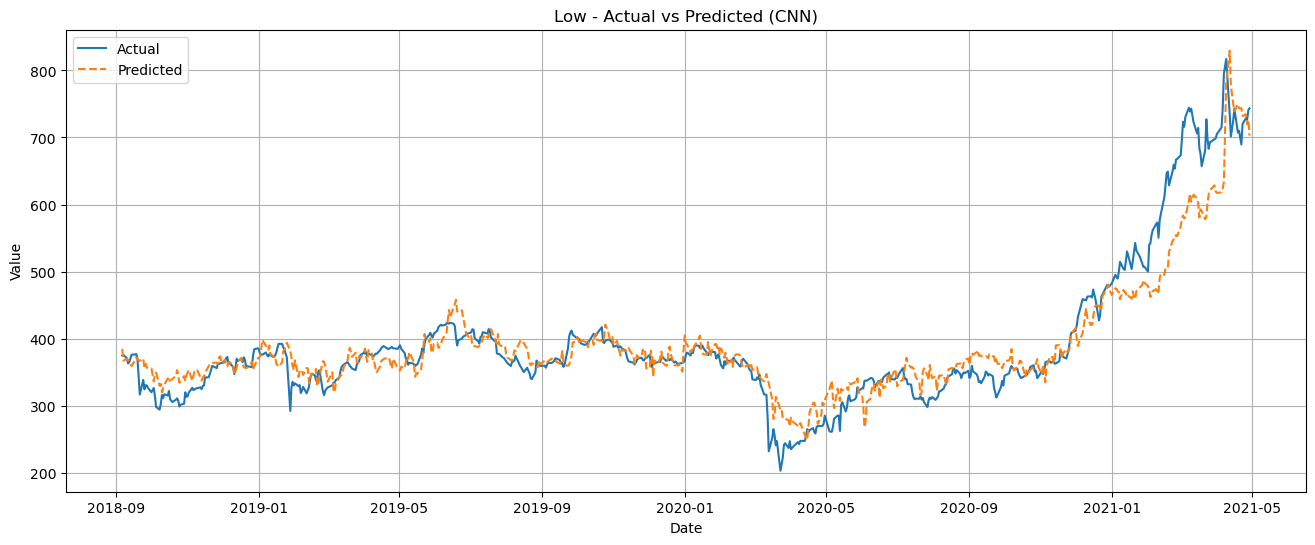

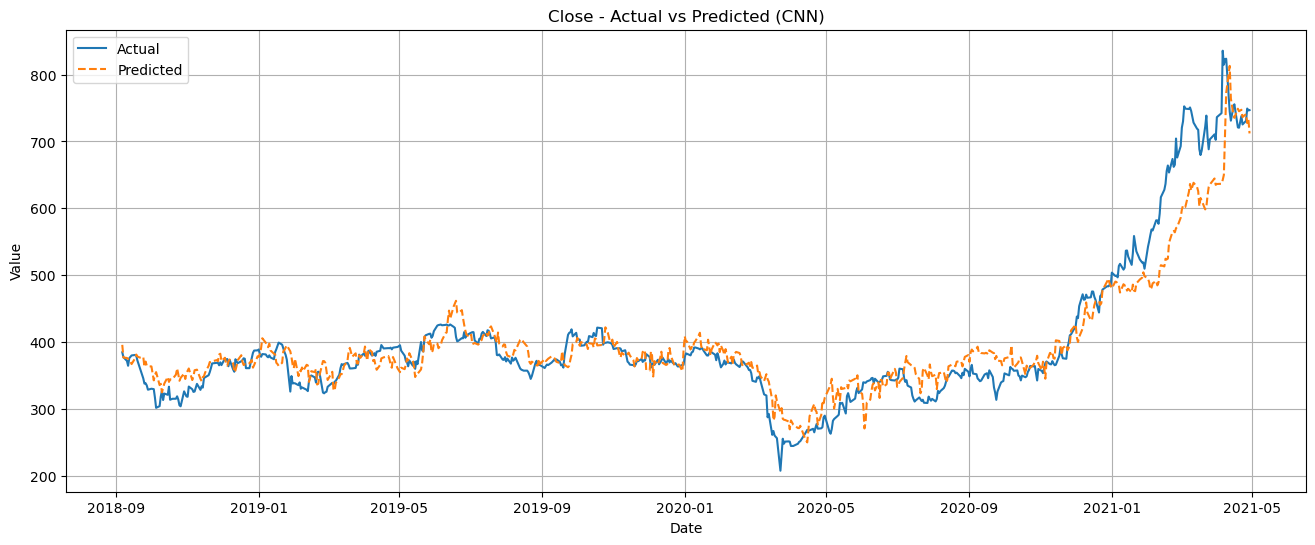

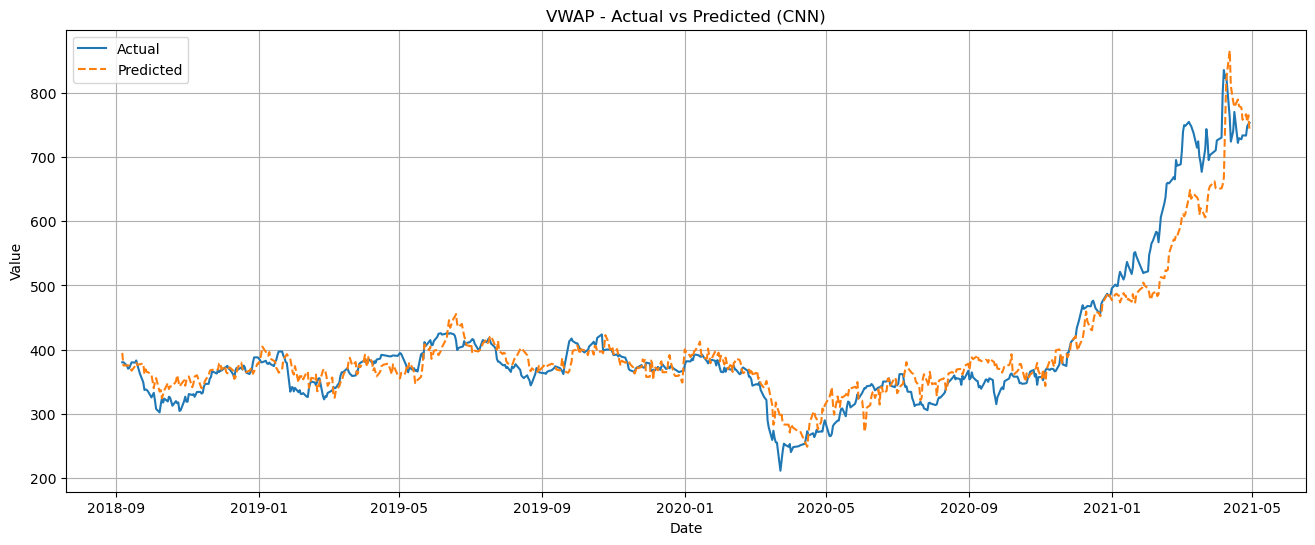

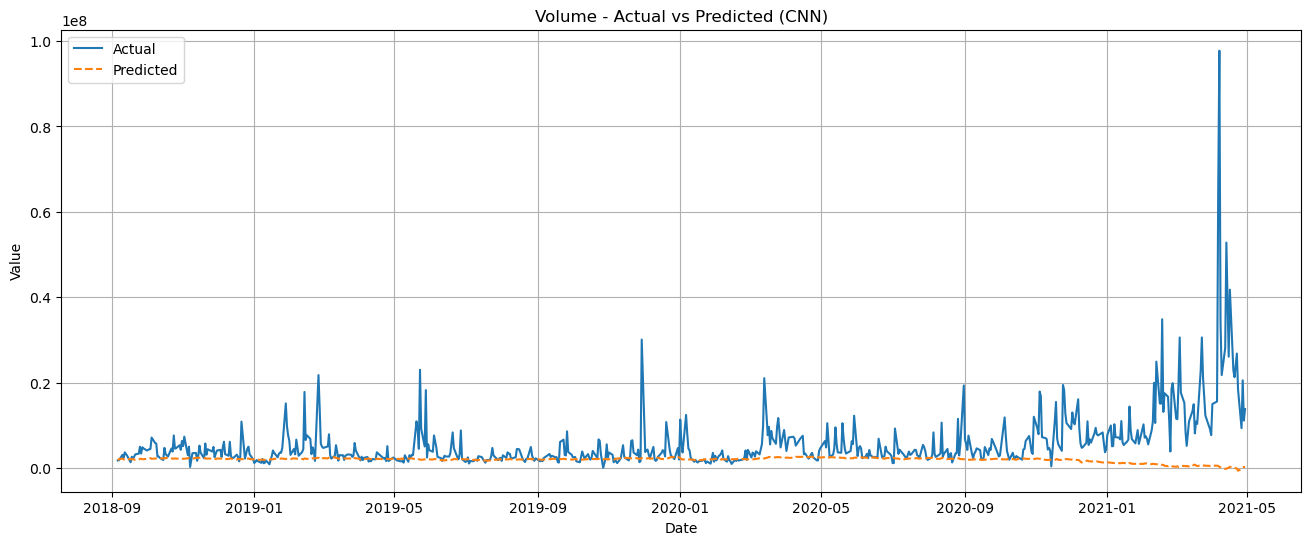

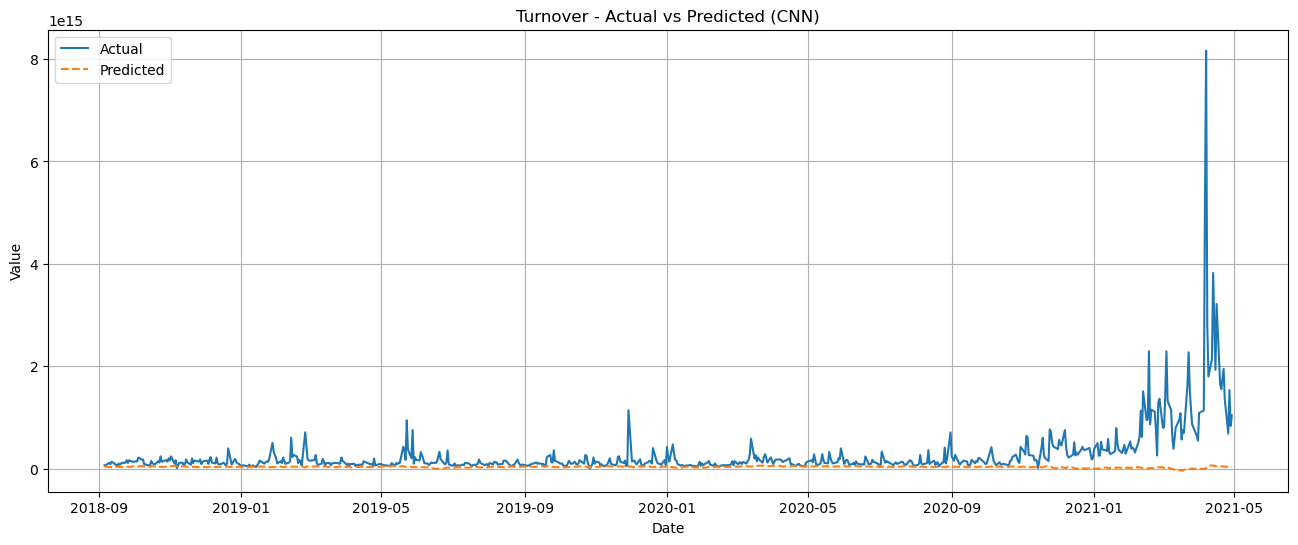

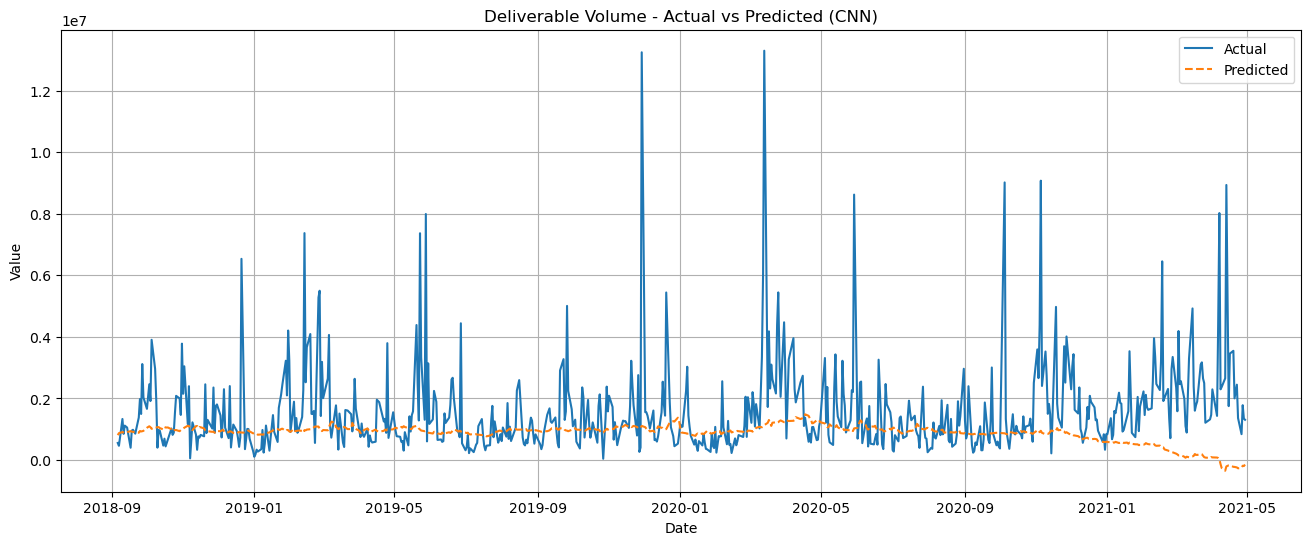

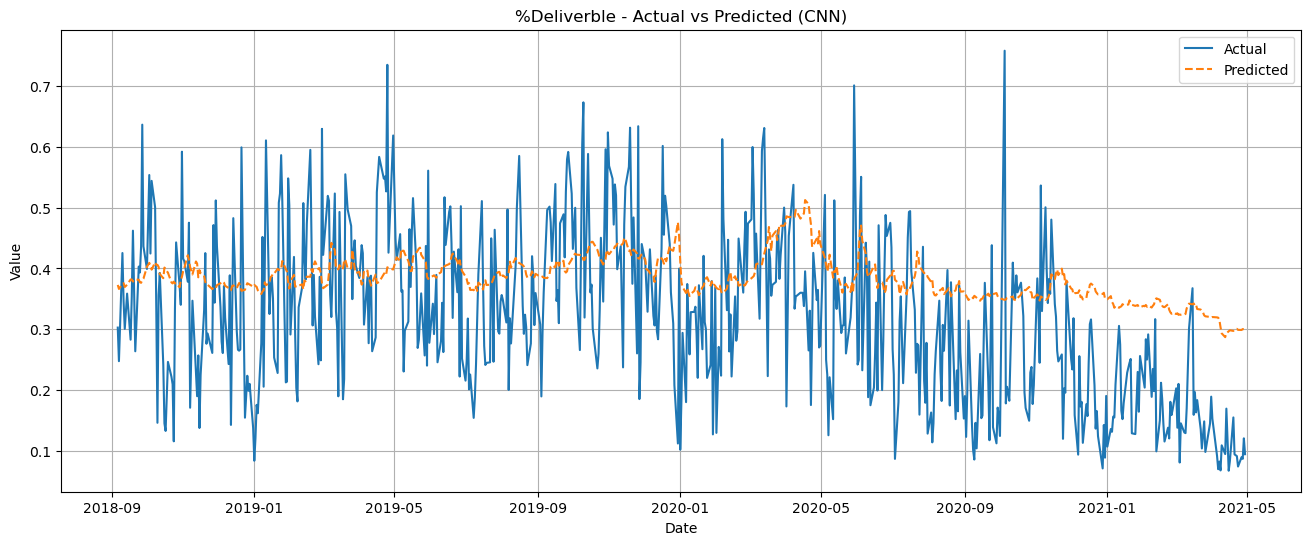

In [40]:
# Print all the columns data with time series plot about the CNN result
for columns in All_Columns:
    TimeSeriesPlot('CNN', columns, predicted_last_20_CNN);

In [41]:
#Ttitle for print all the predict result
Title = "Predict result with different models";

actual_df = actual_last_20;

DataFrameMap = {
    "Actual" : actual_df[All_Columns],
    "LSTM" : predictions_df[All_Columns],
    "RNN" : predictions_df_RNN[All_Columns],
    "CNN" : predictions_df_CNN[All_Columns]
}

In [42]:
# Function to plot time series data
def plot_time_series_all(actual_series, model_data_map, column):    
    plt.figure(figsize=(16, 6));
    plt.plot(actual_series.index, actual_series, label='Actual');
    for model_name, model_series in model_data_map.items():
        if model_name != "Actual":
            plt.plot(model_series.index, model_series, linestyle='--', label=model_name);
    plt.title(f"{column} - Actual vs Predicted");
    plt.xlabel('Date');
    plt.ylabel('Value');
    plt.legend(loc='best');
    plt.grid(True);
    plt.show();

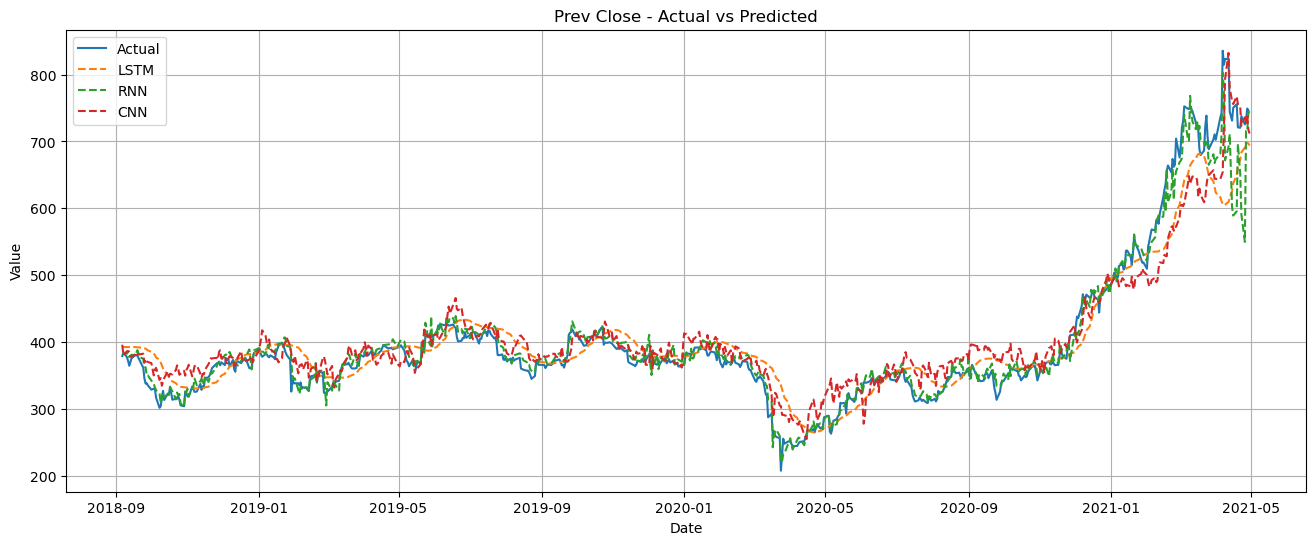

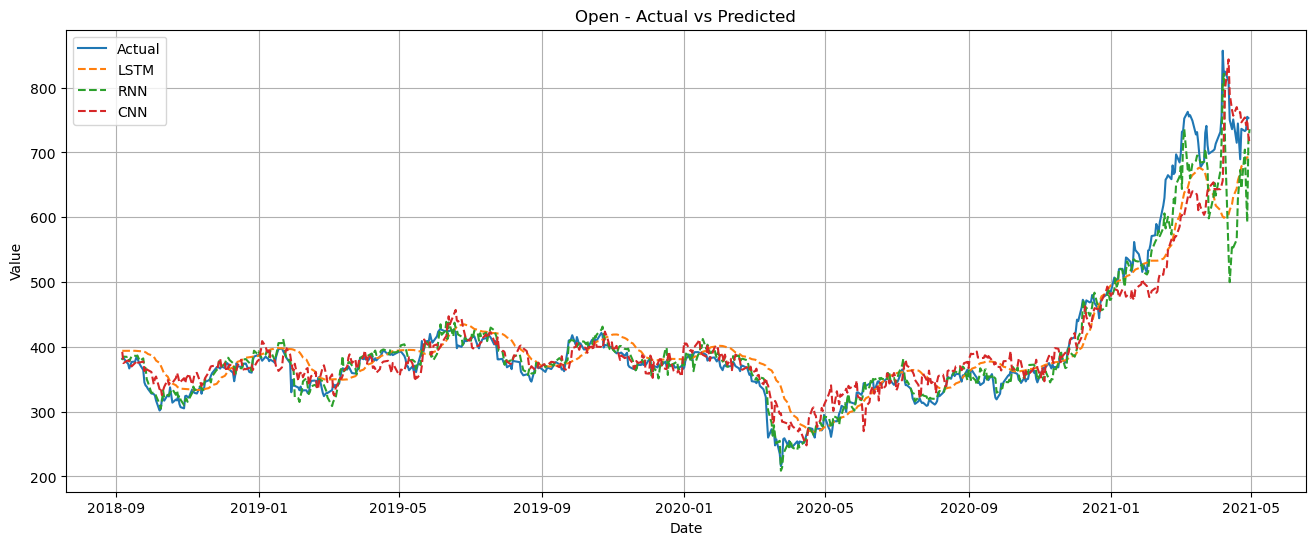

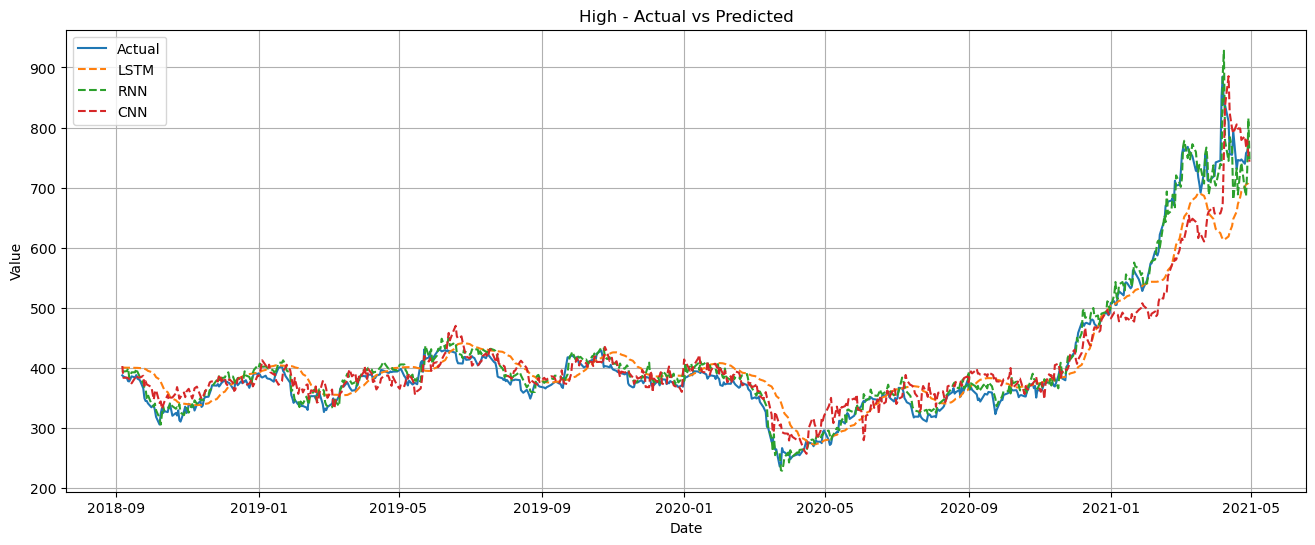

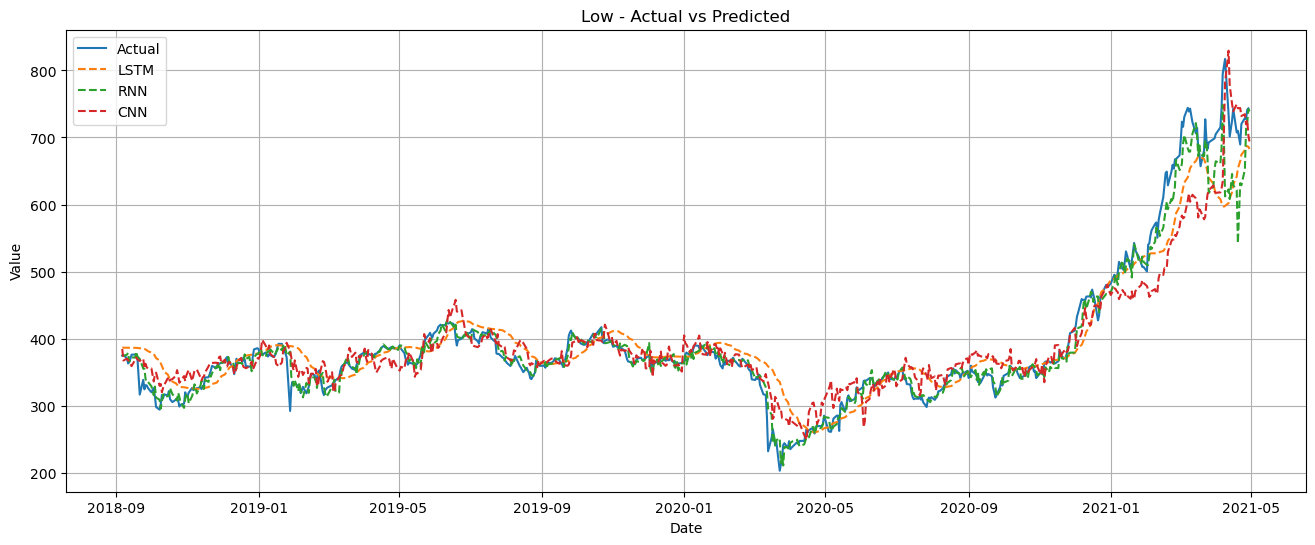

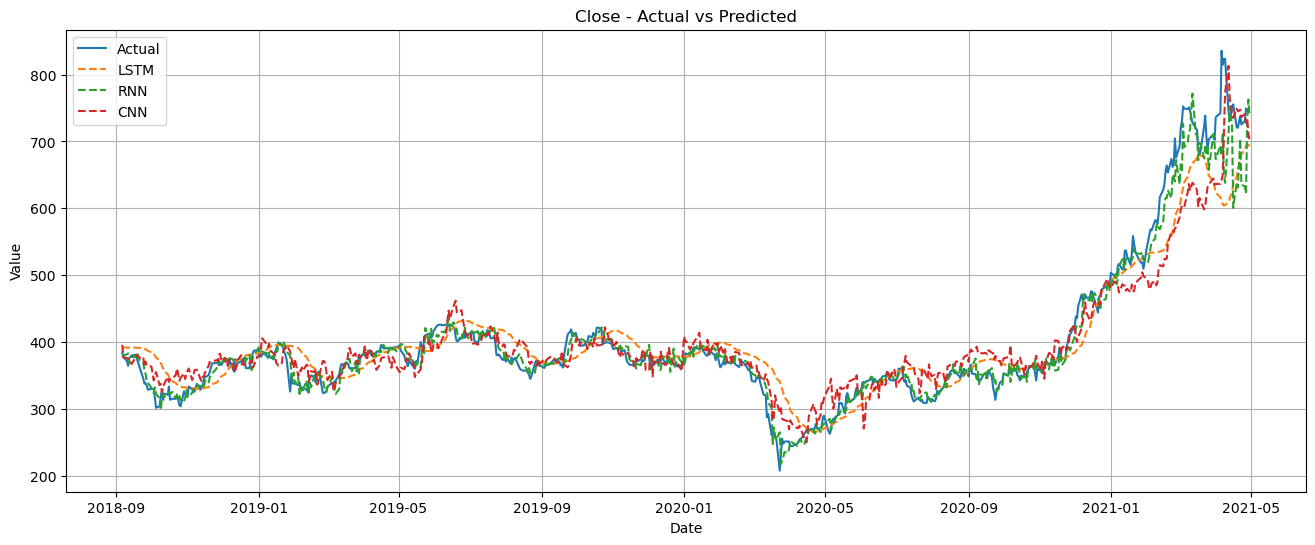

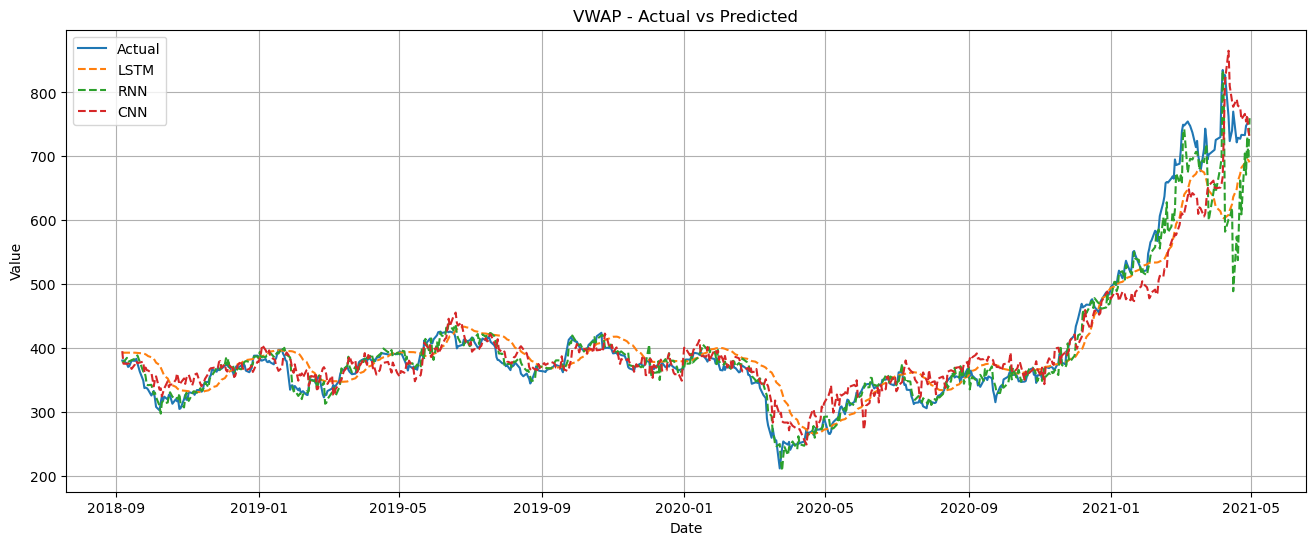

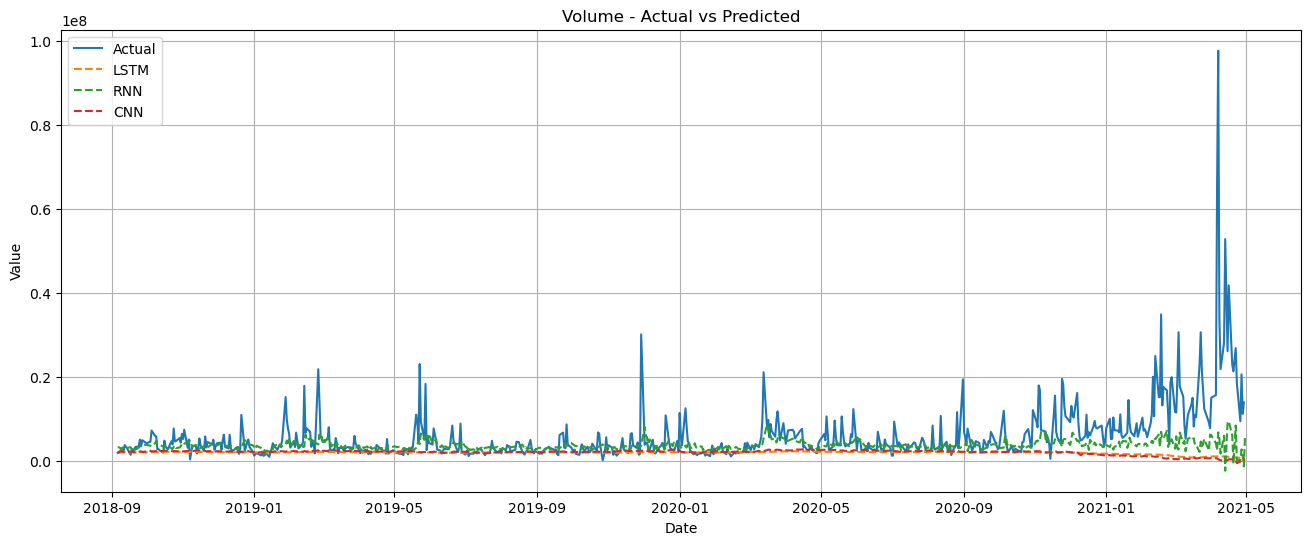

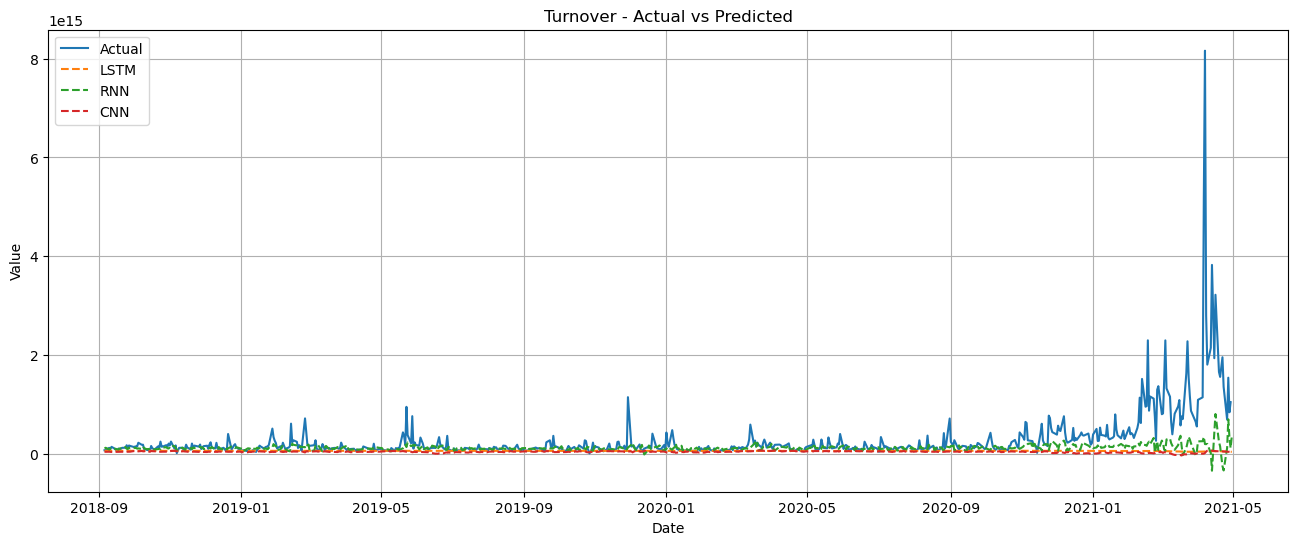

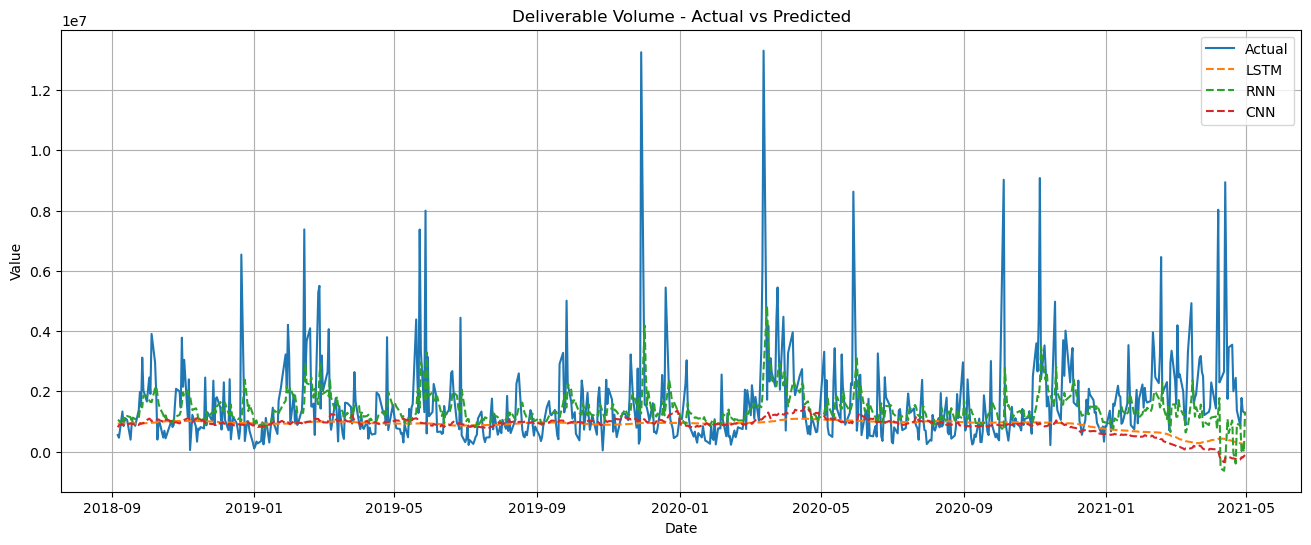

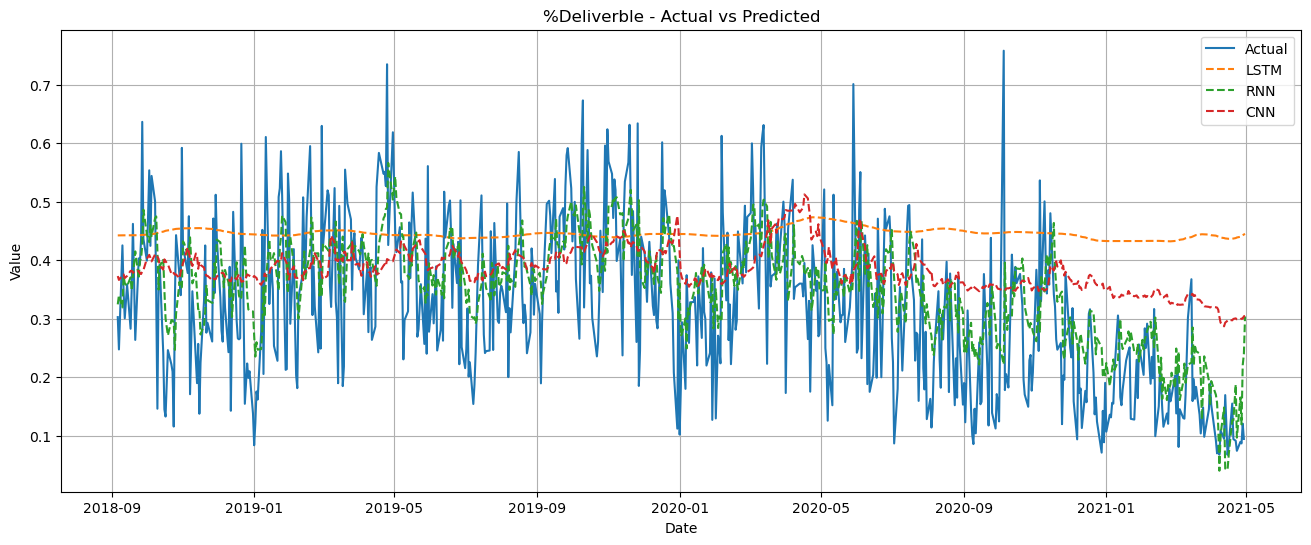

In [43]:
# Print all the columns data with time series plot about the all predictions result
for columns in All_Columns:
    # Get the actual series 
    actual_series = DataFrameMap["Actual"][columns];
    
    # Create the model_data_map 
    model_data_map = {model_name: model_data[columns] for model_name, model_data in DataFrameMap.items() if model_name != "Actual"};
    
    # Call the plot function 
    plot_time_series_all(actual_series, model_data_map, columns);